In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('./Electricity BILL.csv')

Part (a)

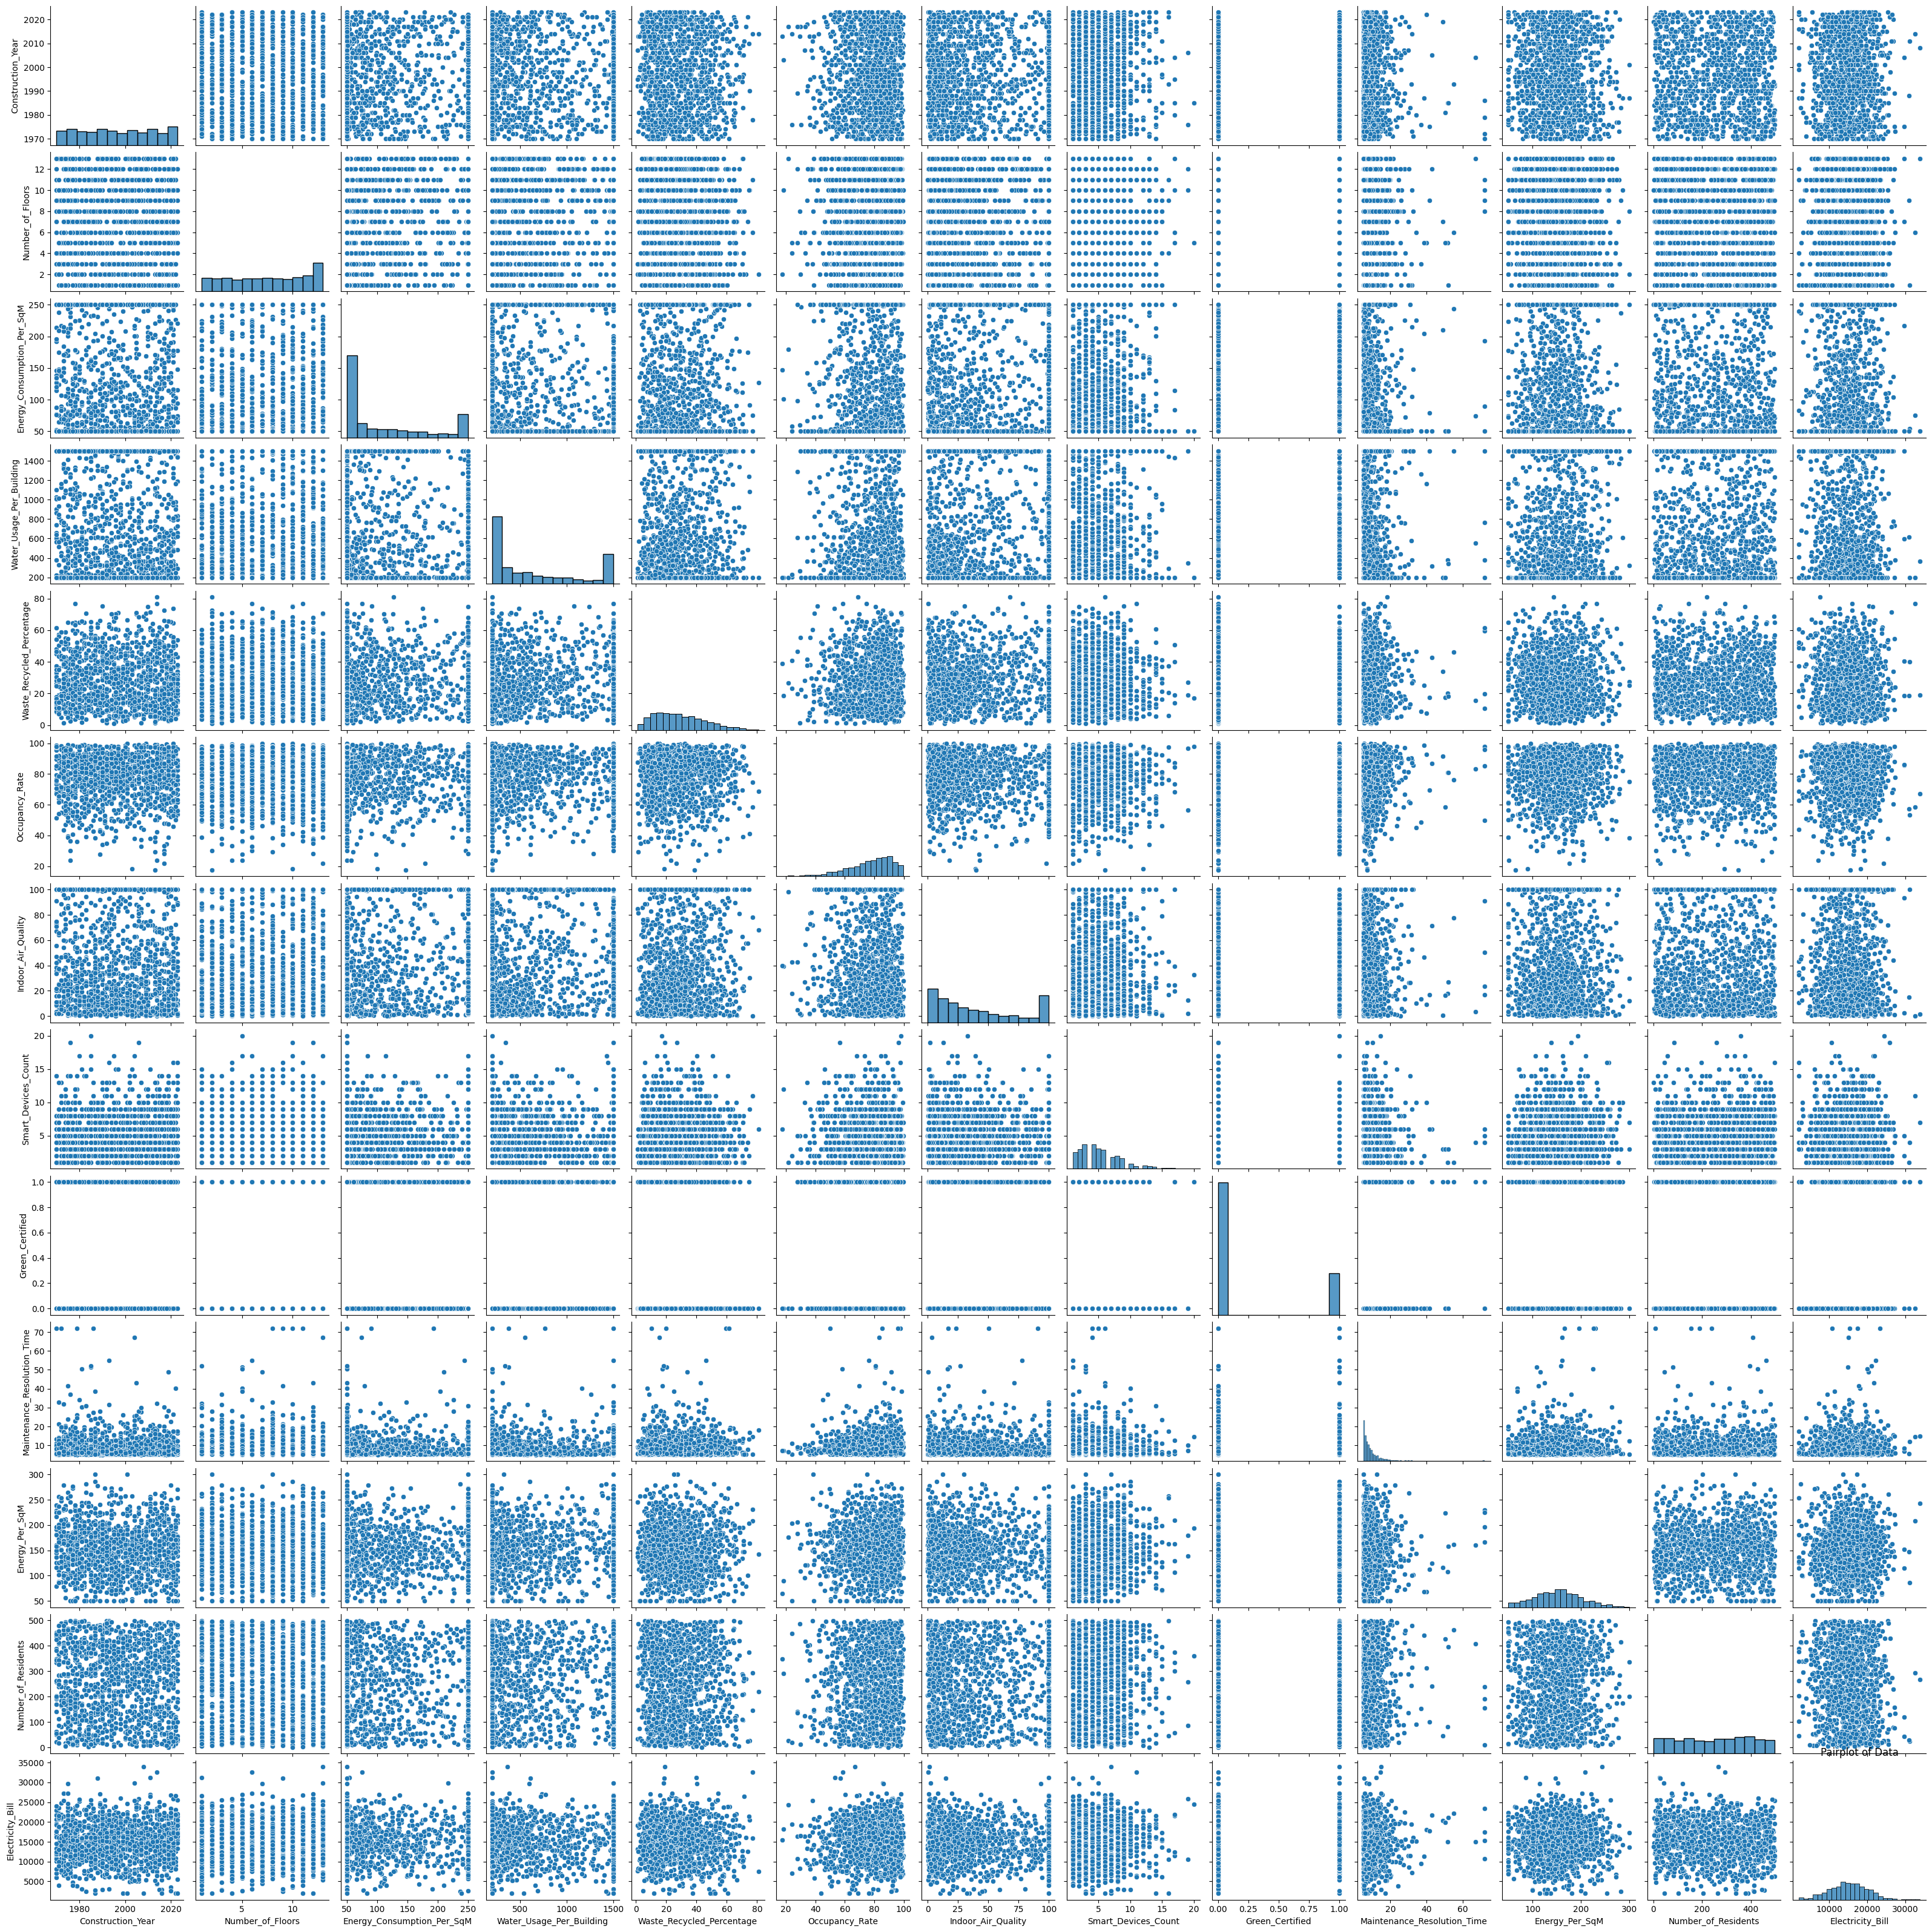

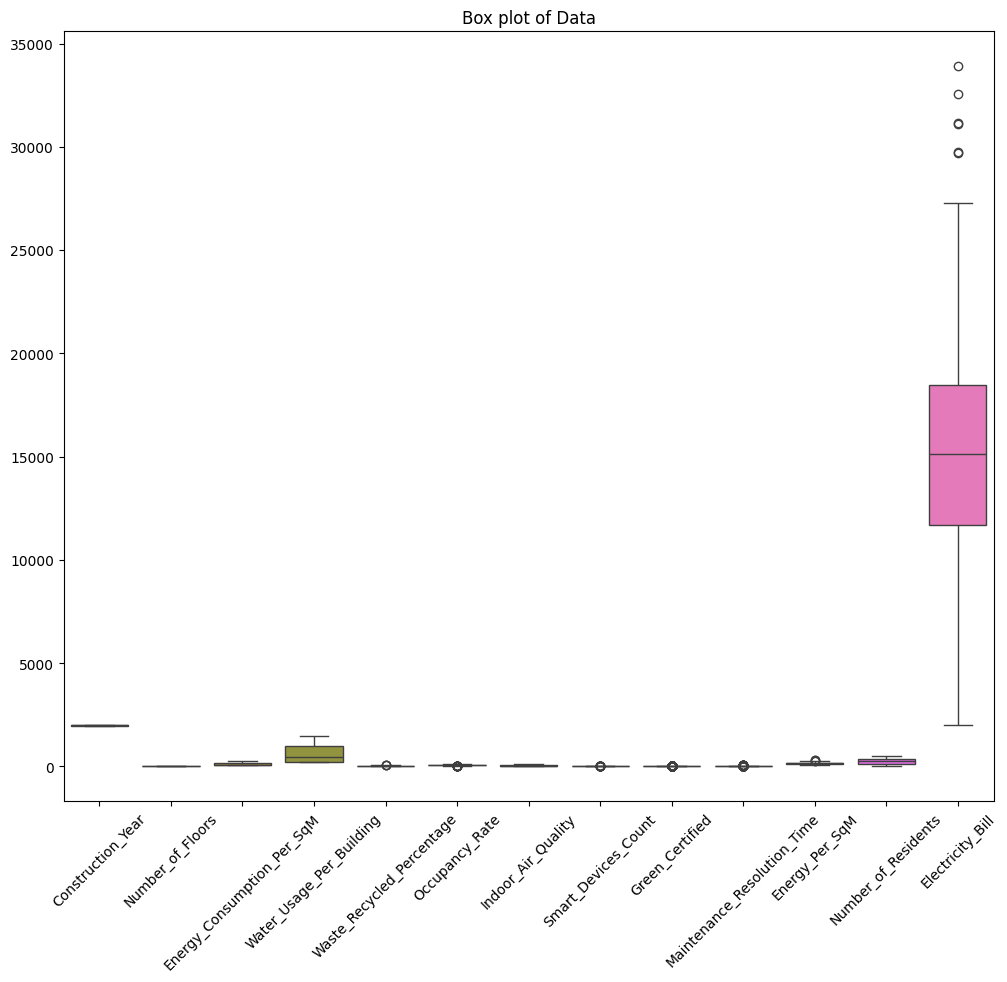

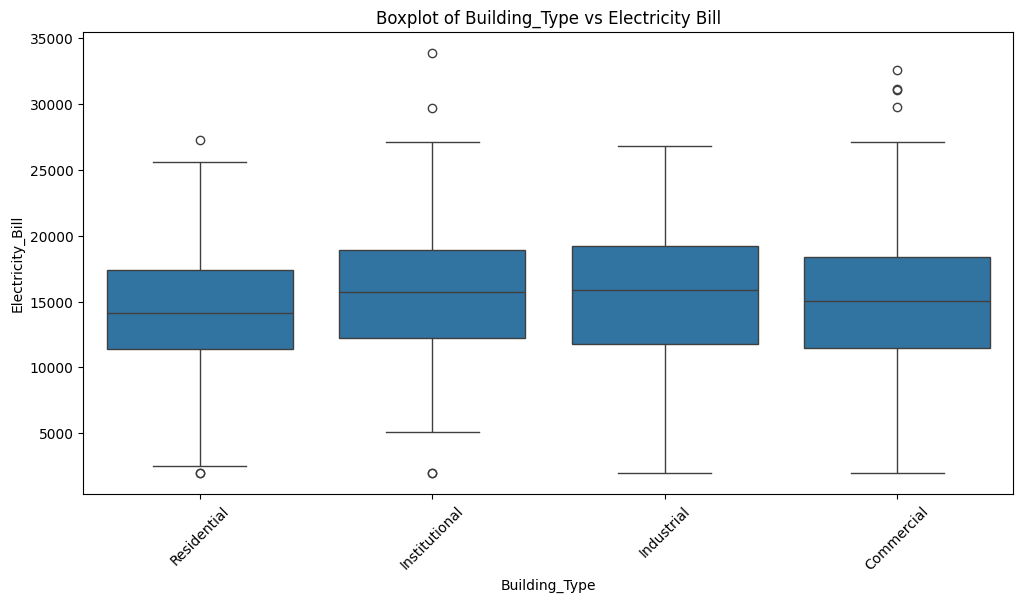

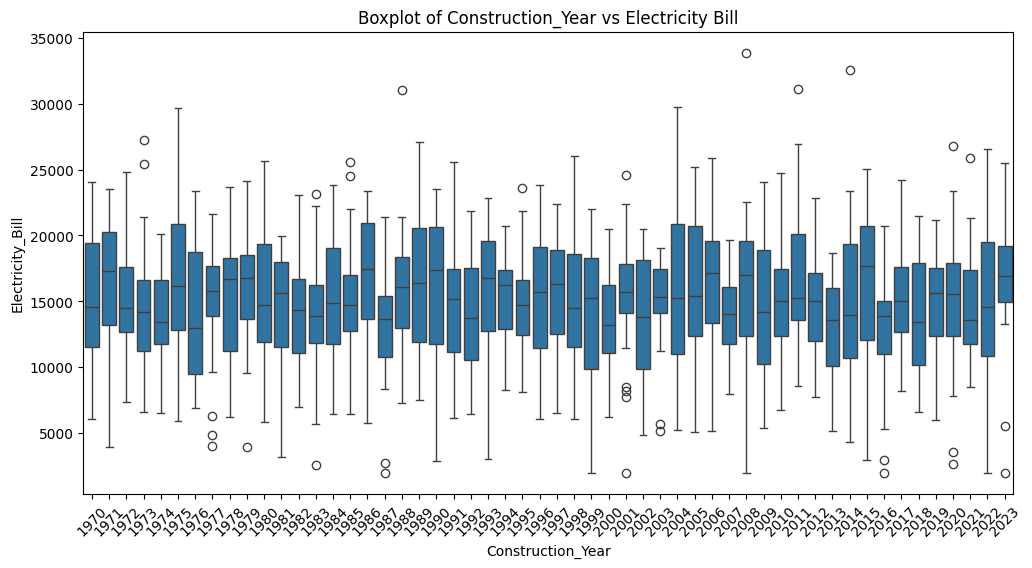

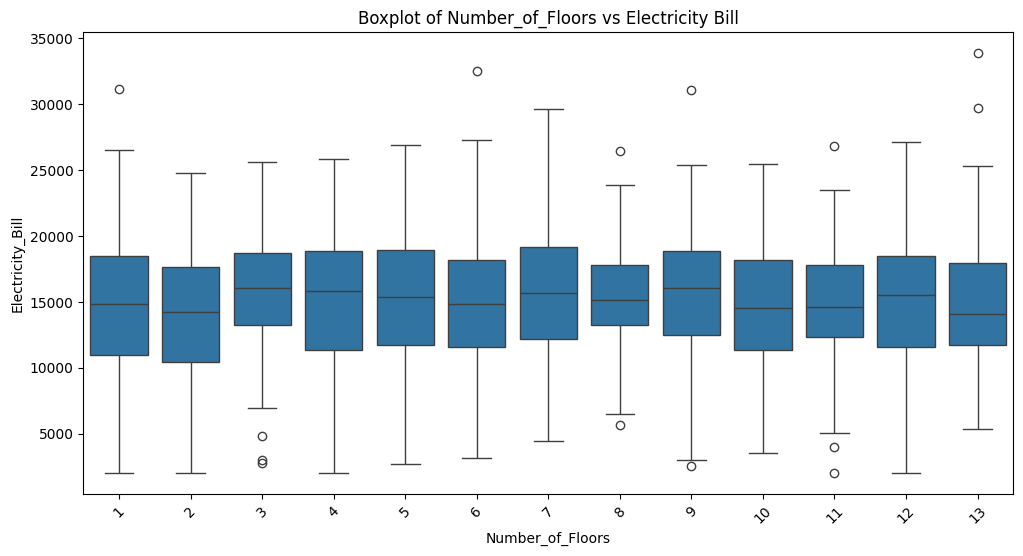

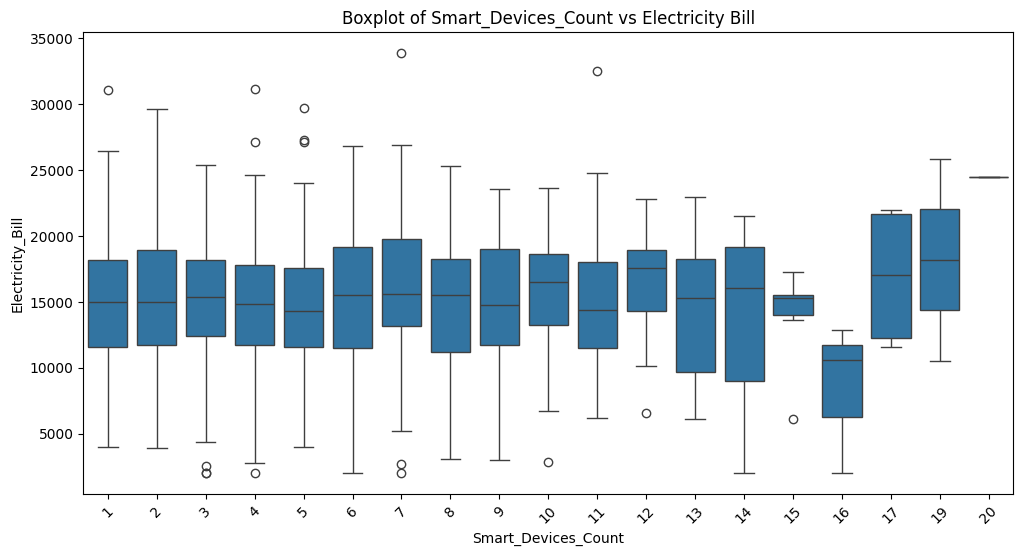

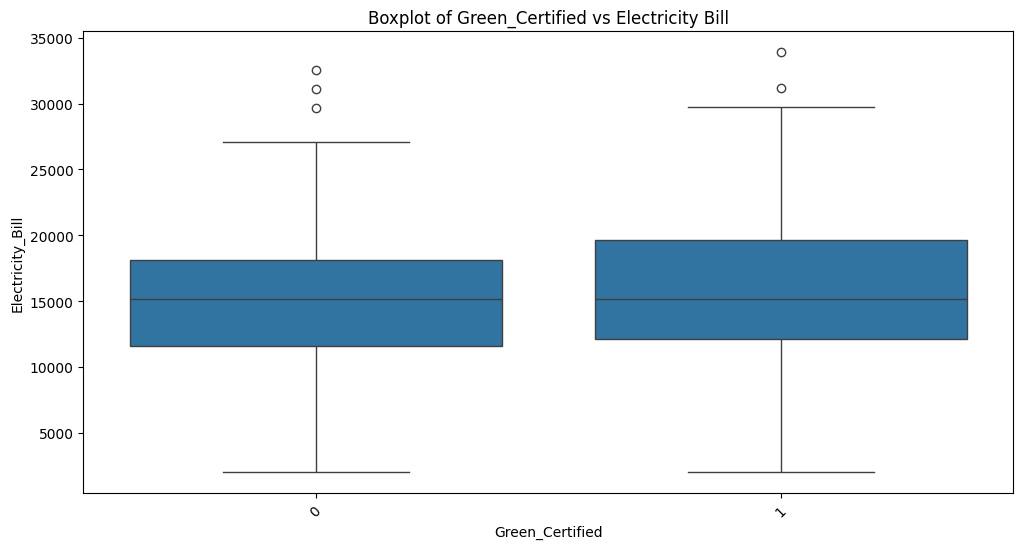

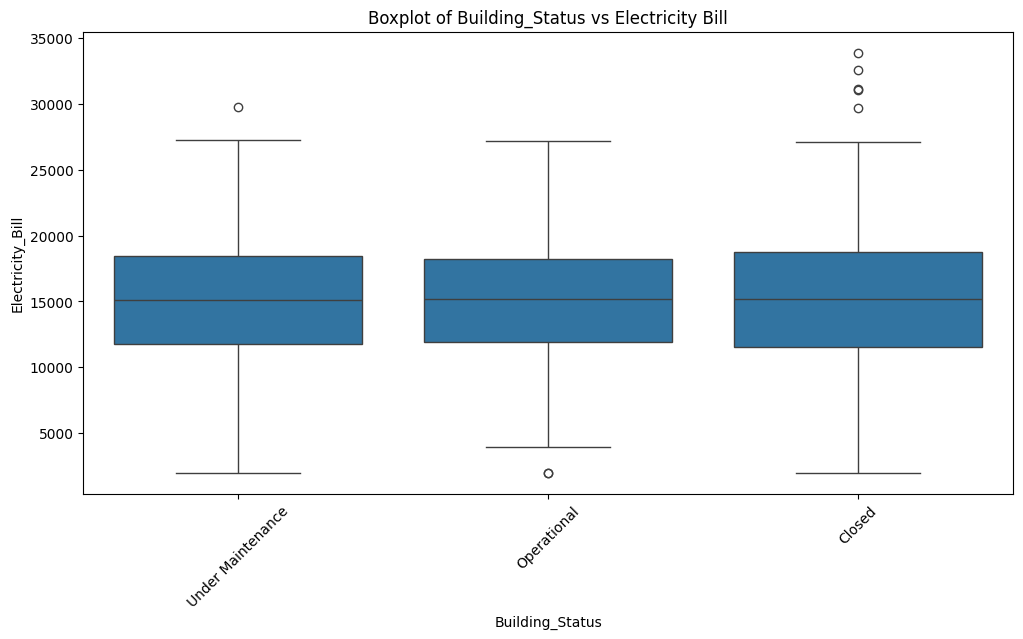

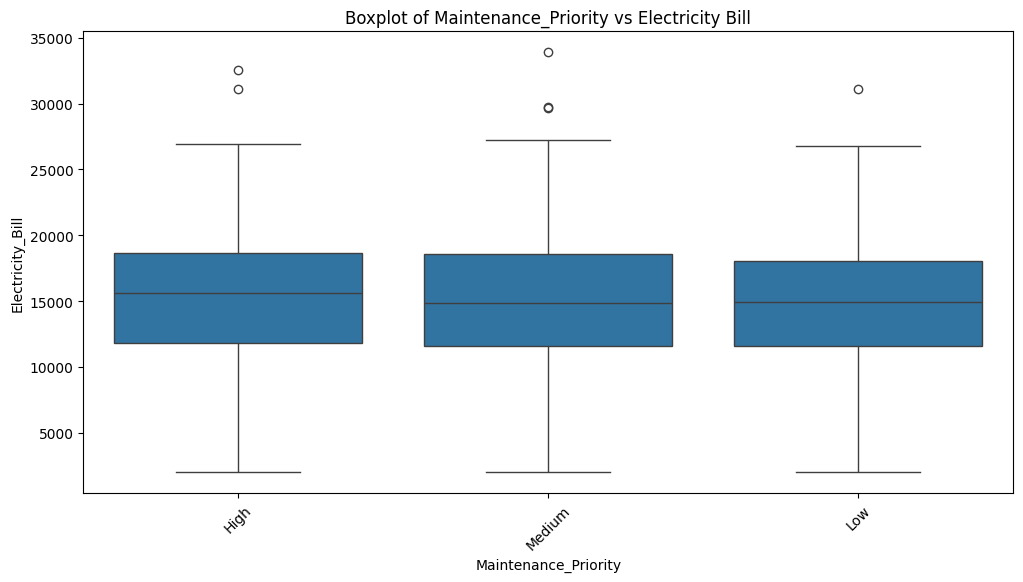

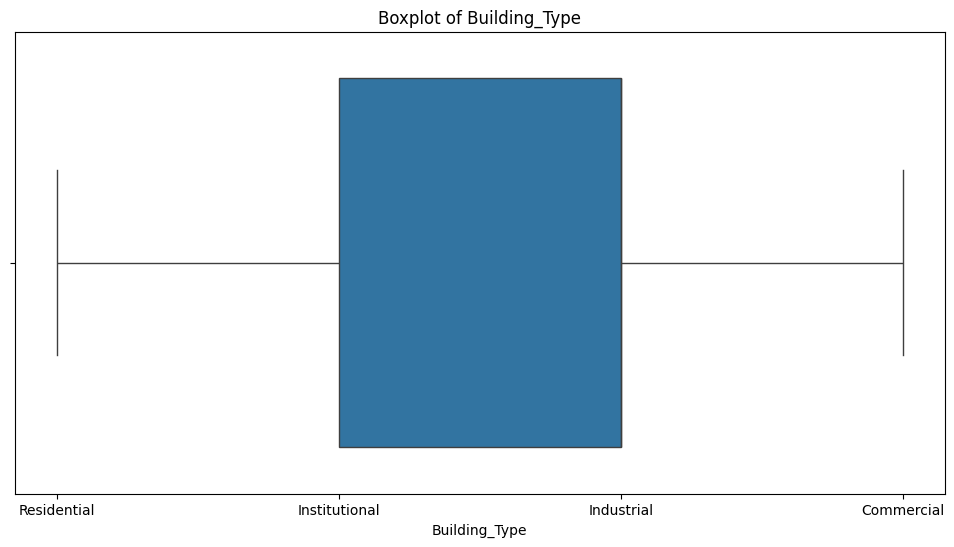

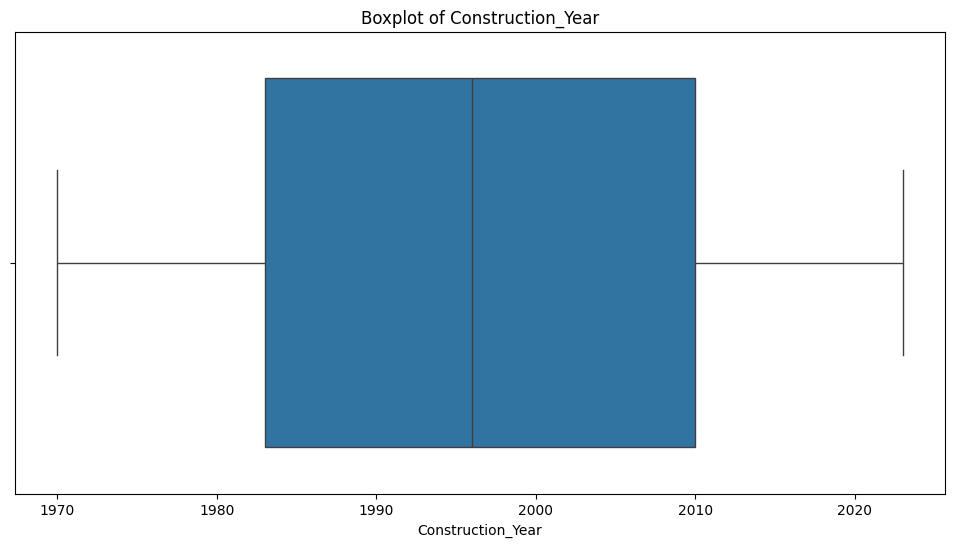

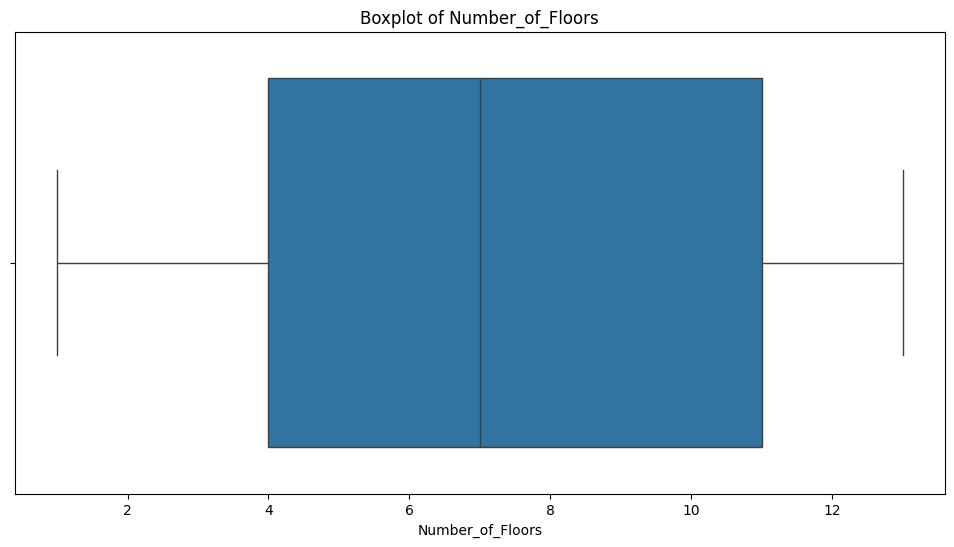

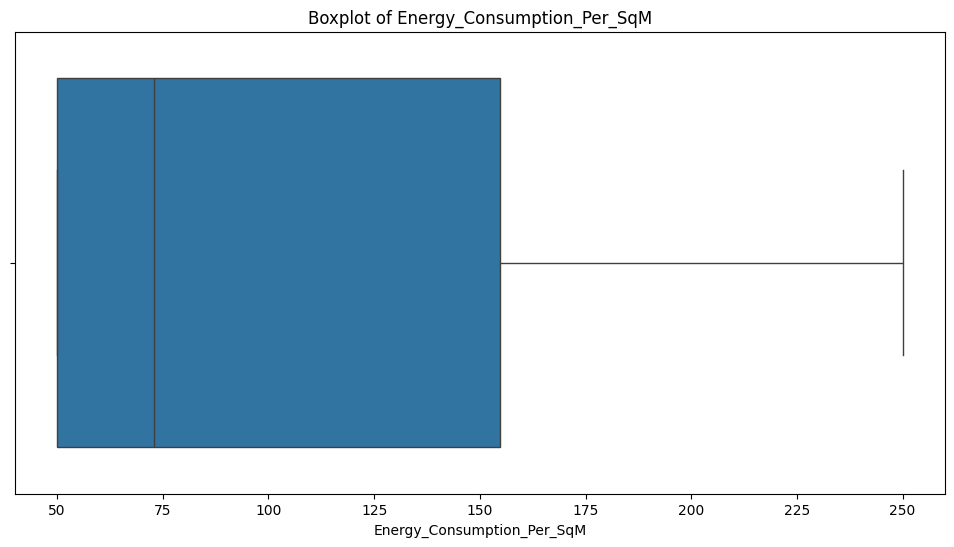

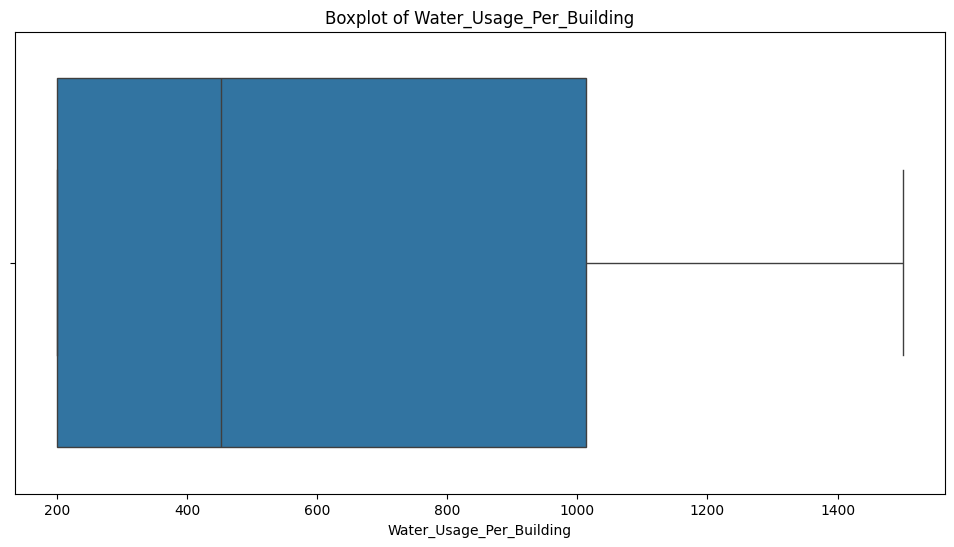

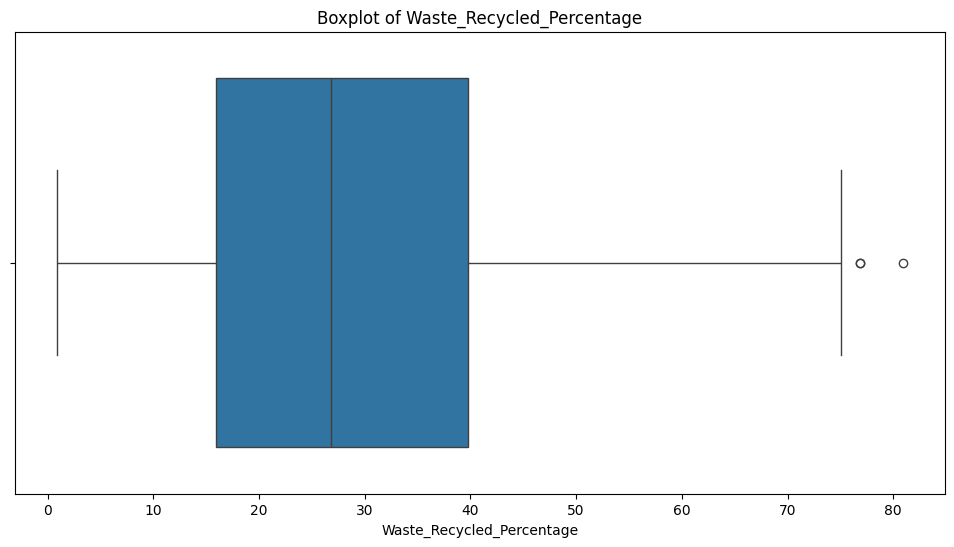

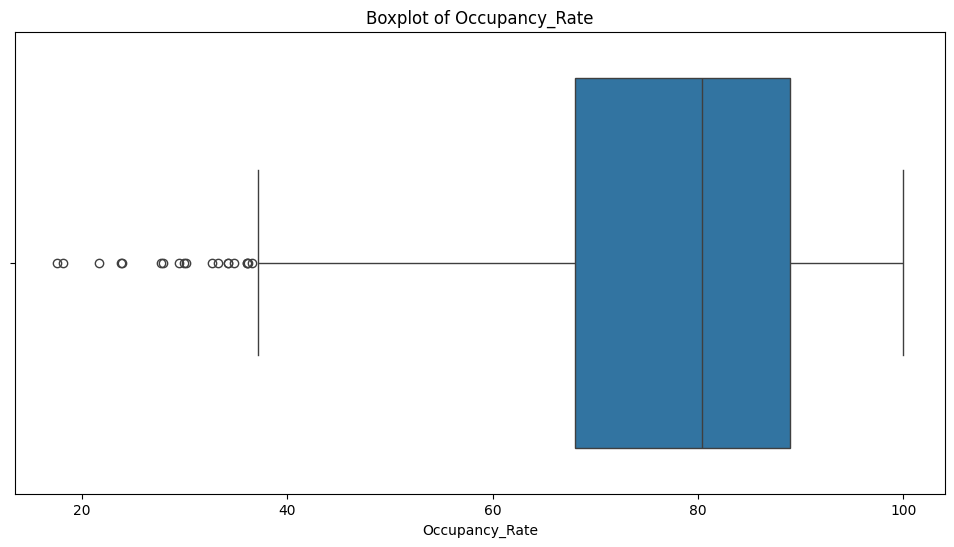

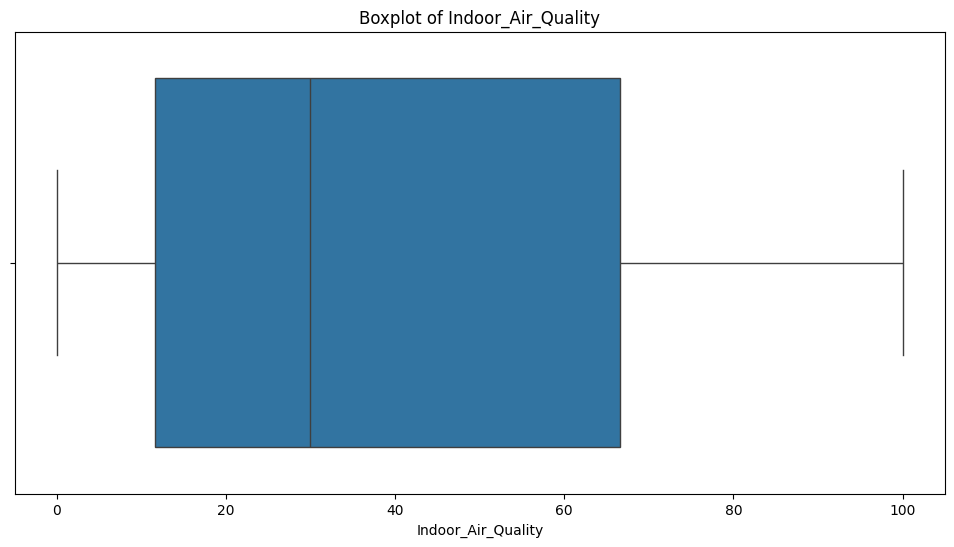

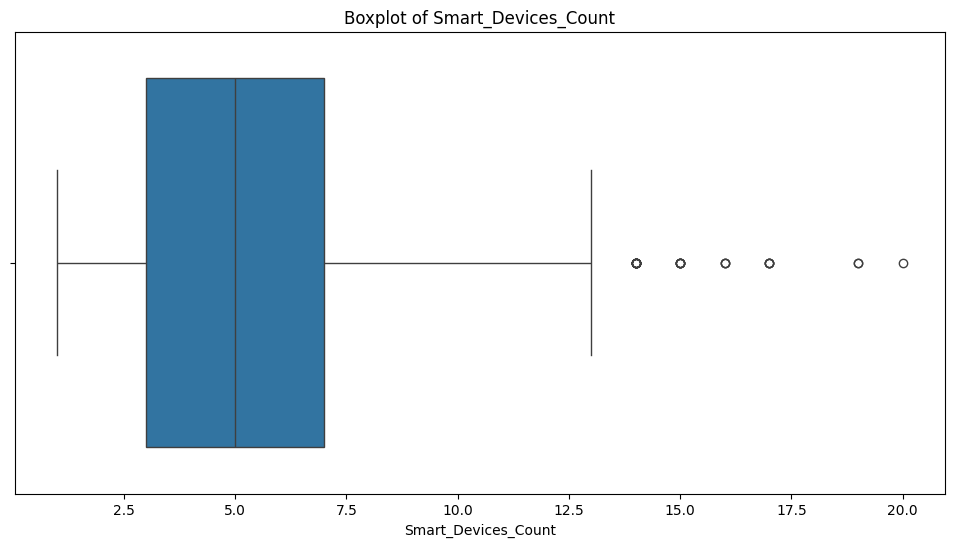

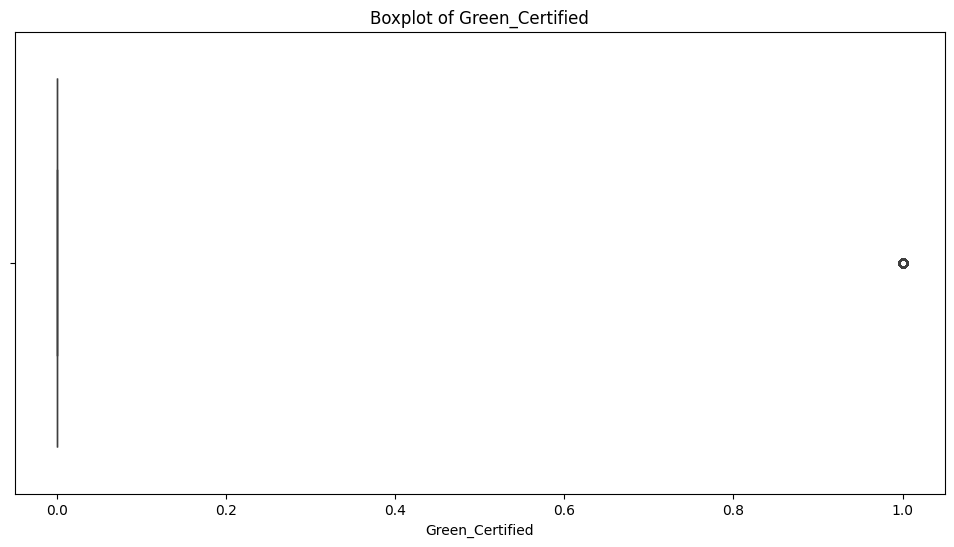

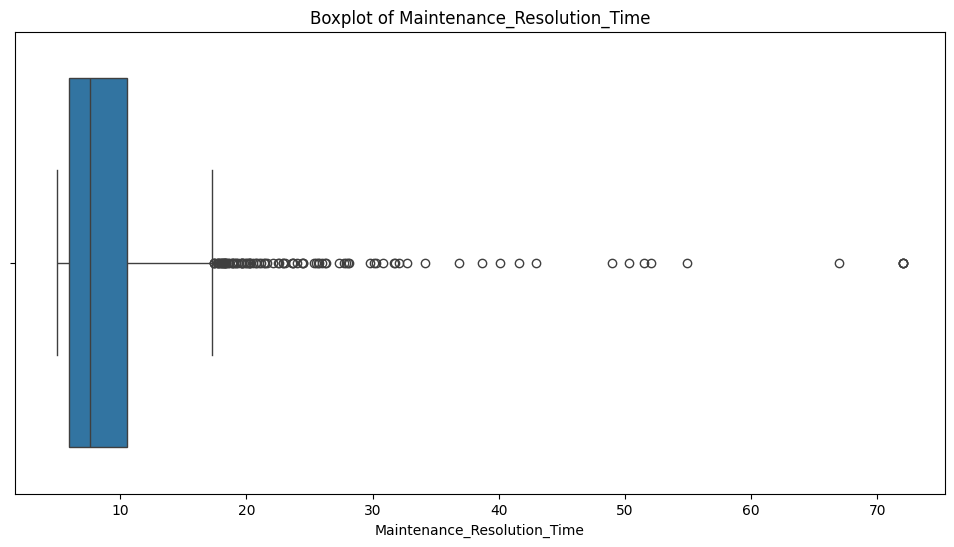

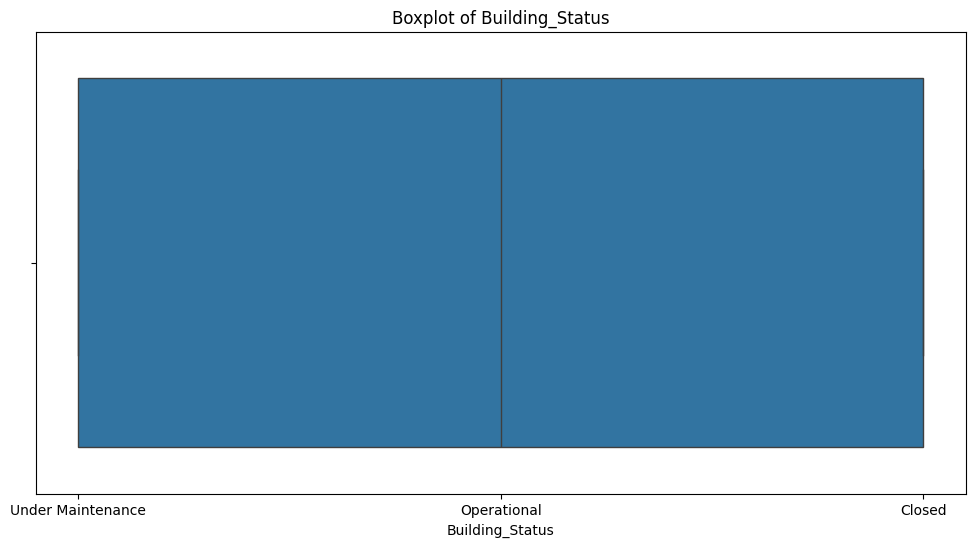

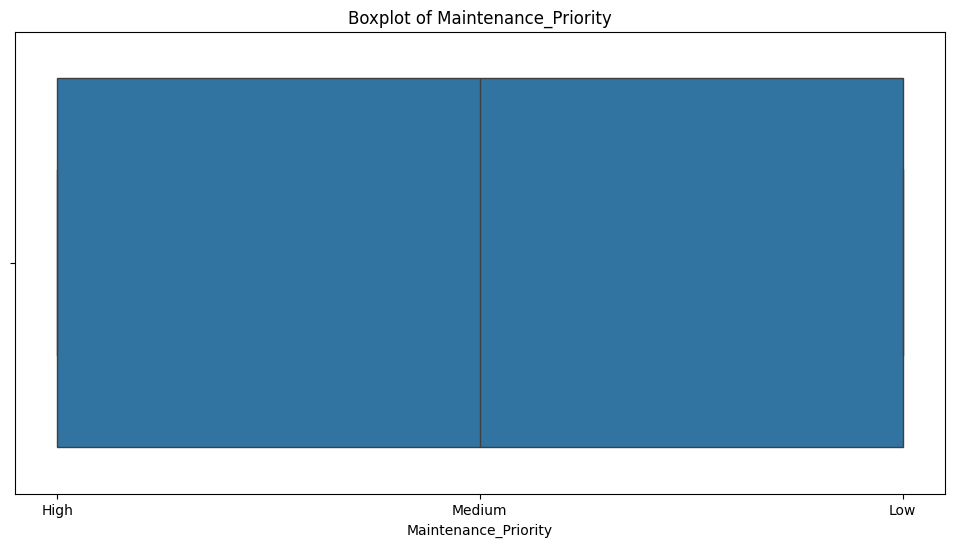

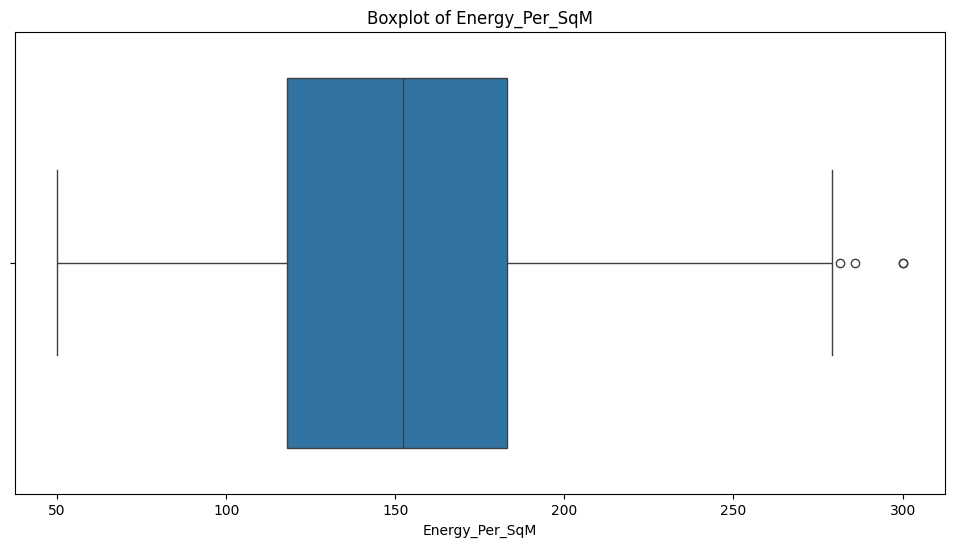

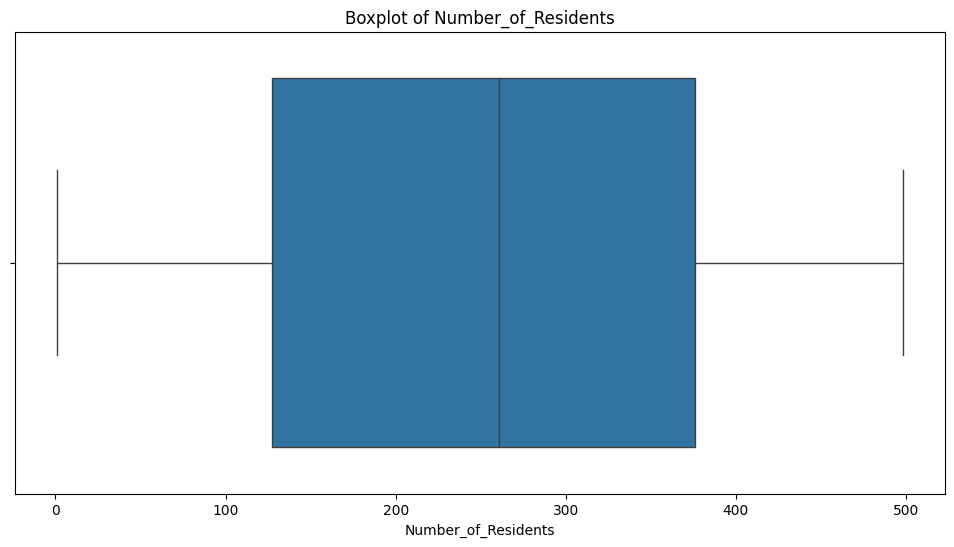

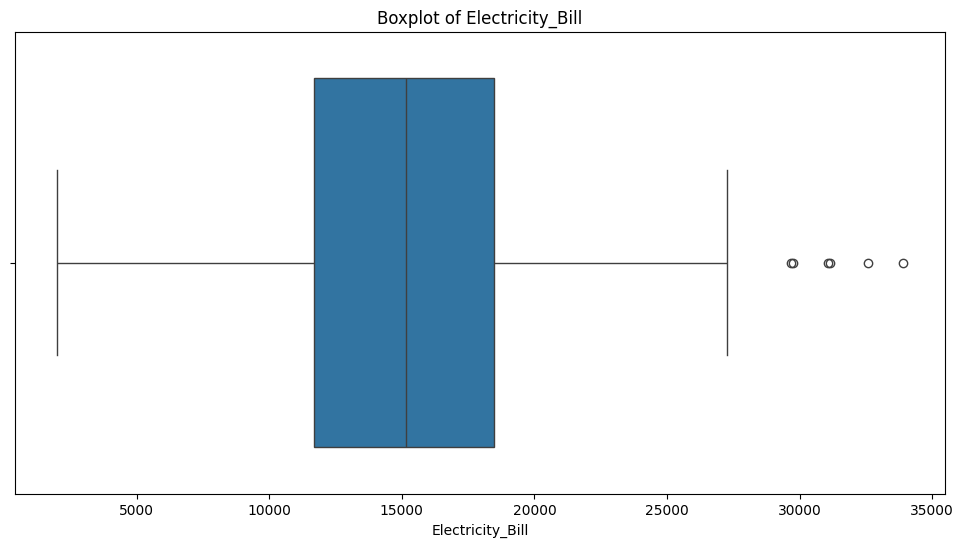

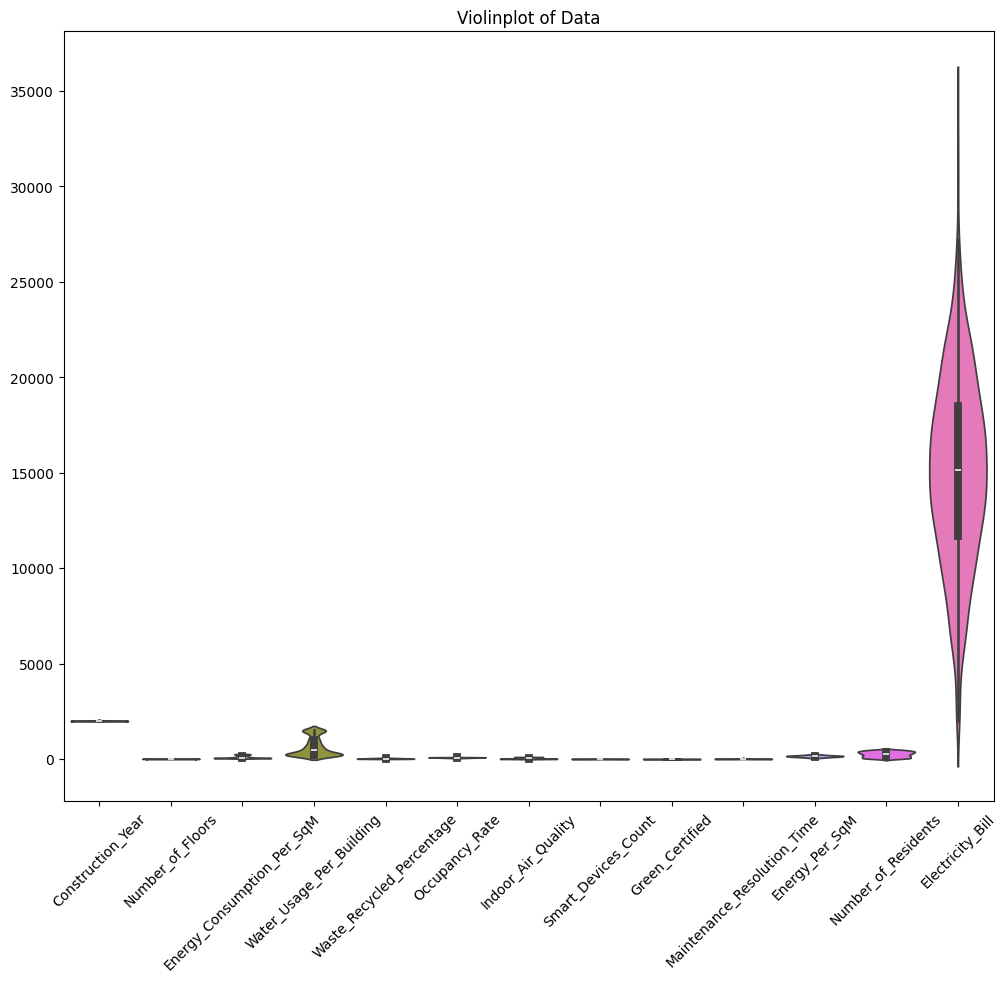

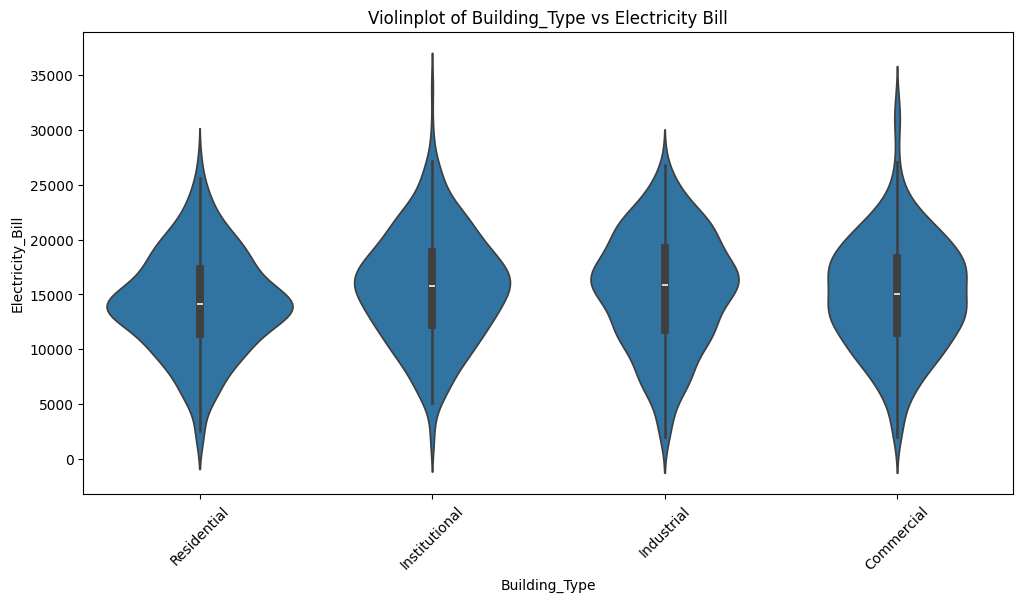

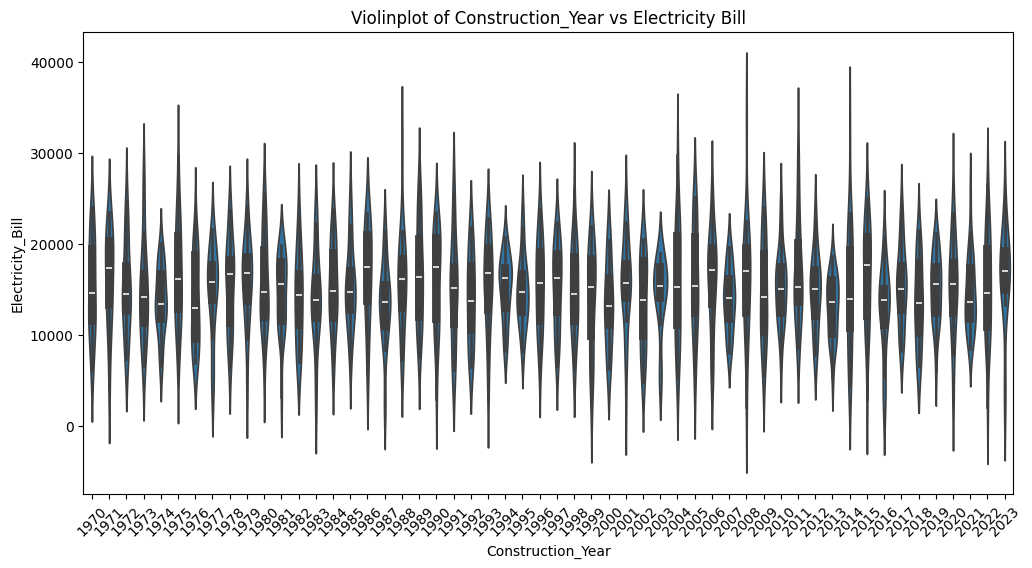

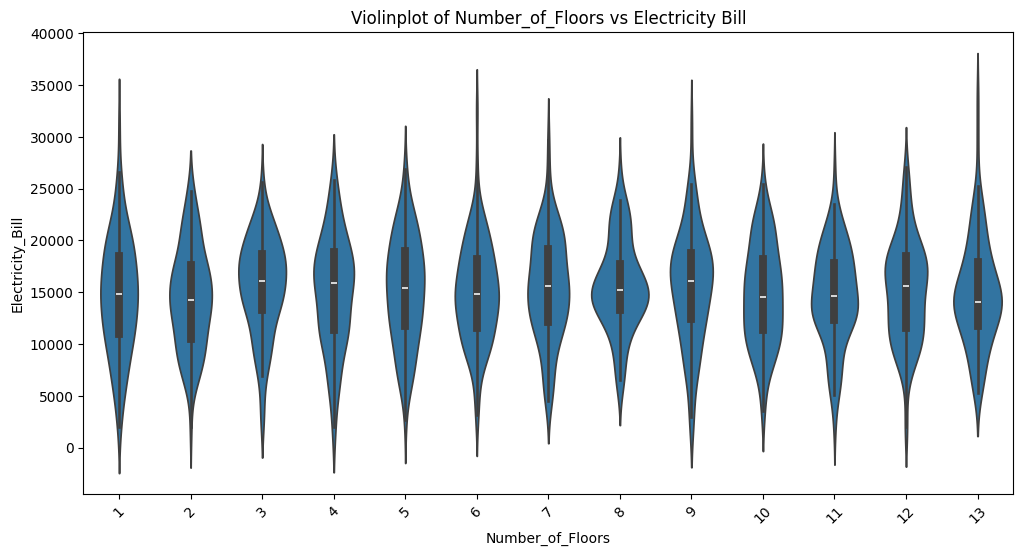

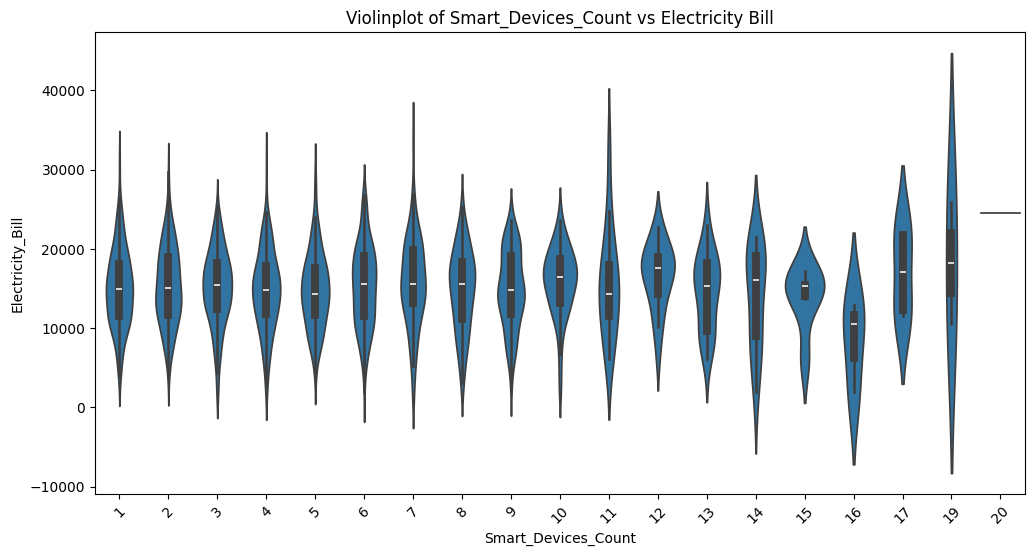

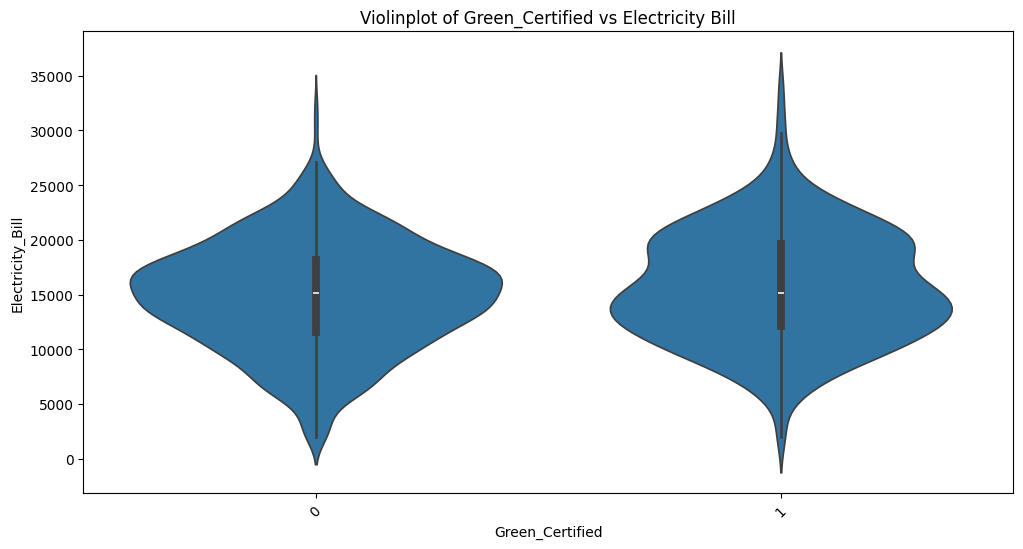

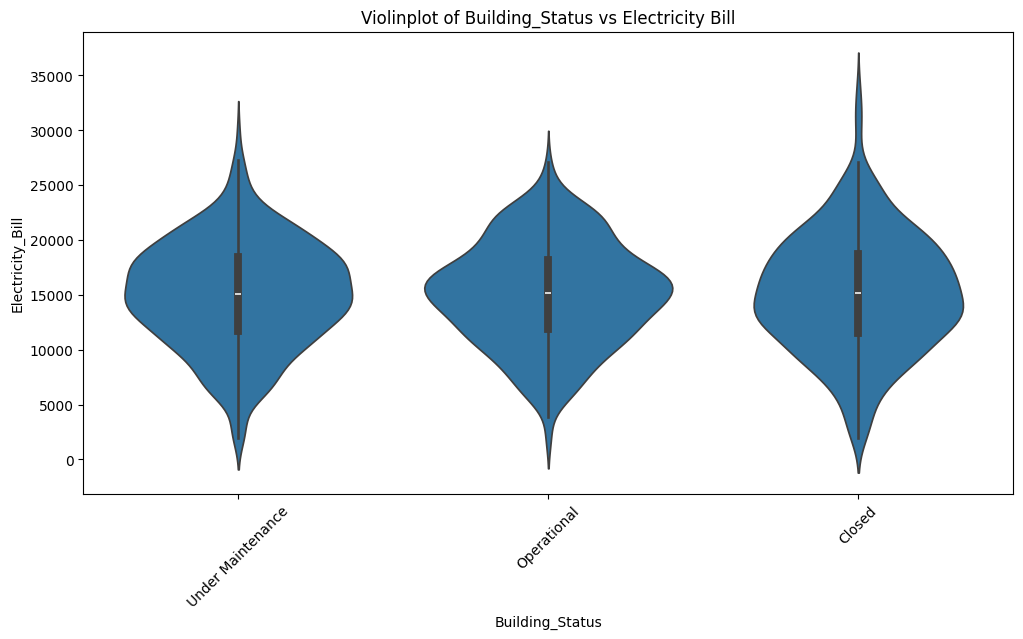

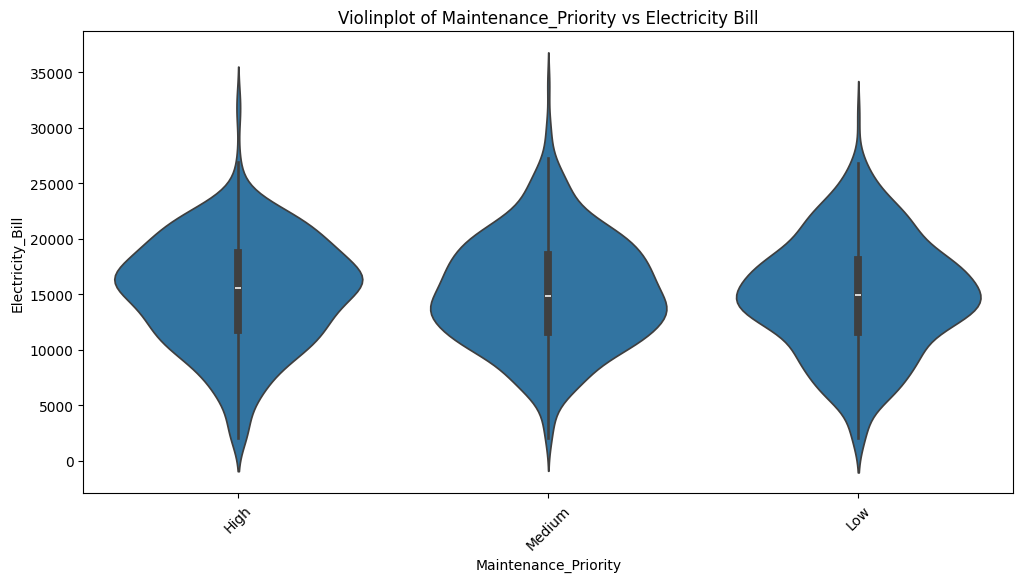

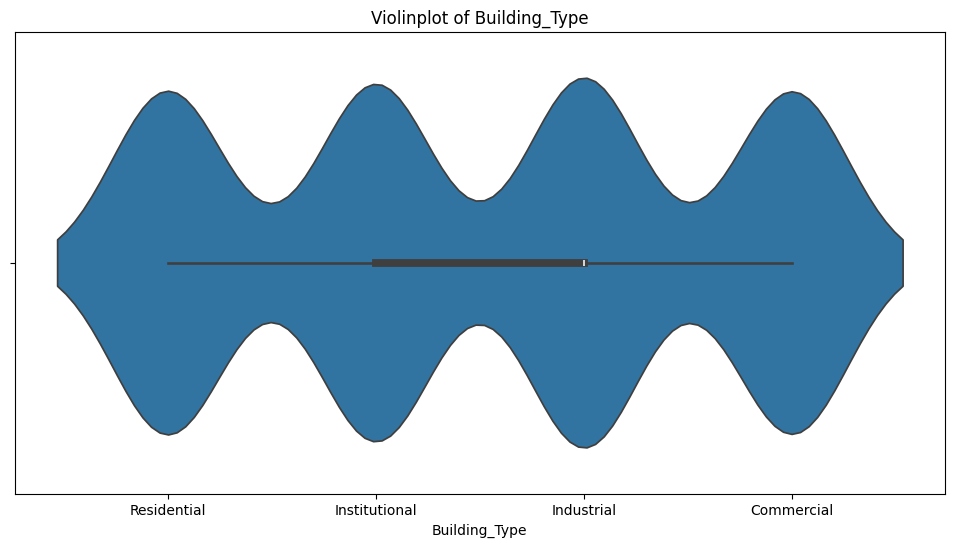

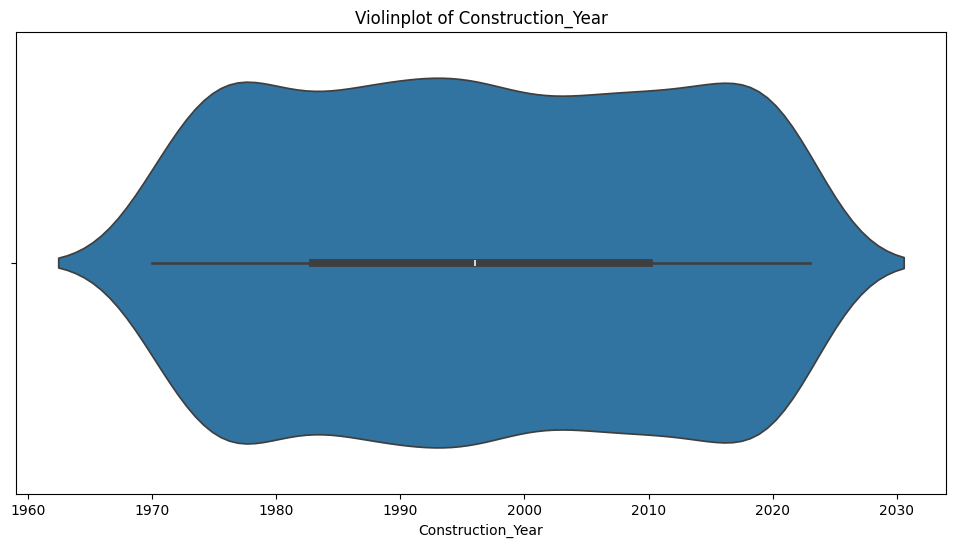

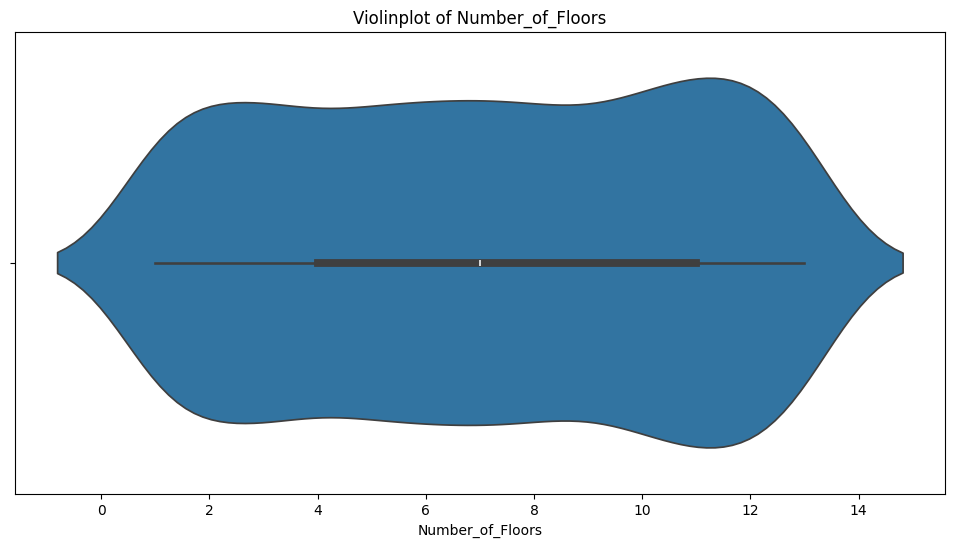

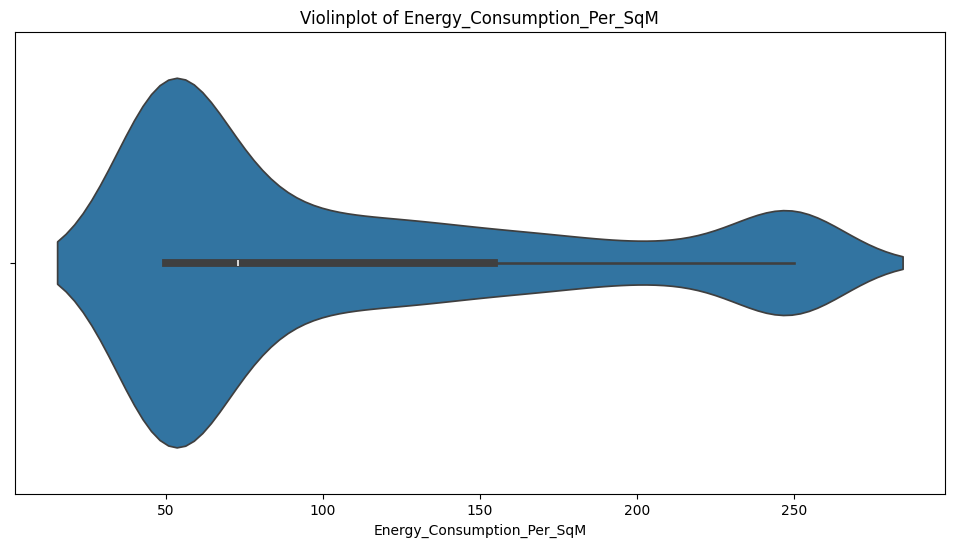

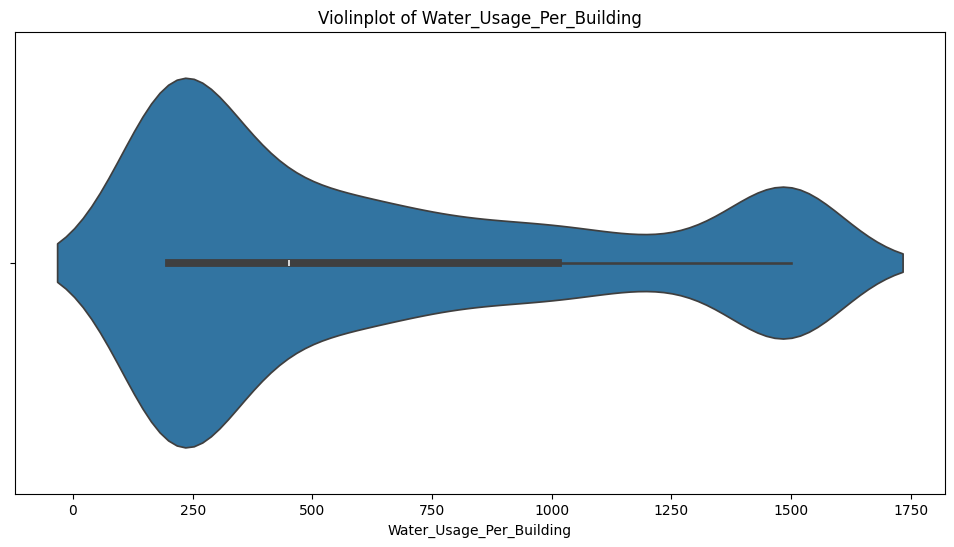

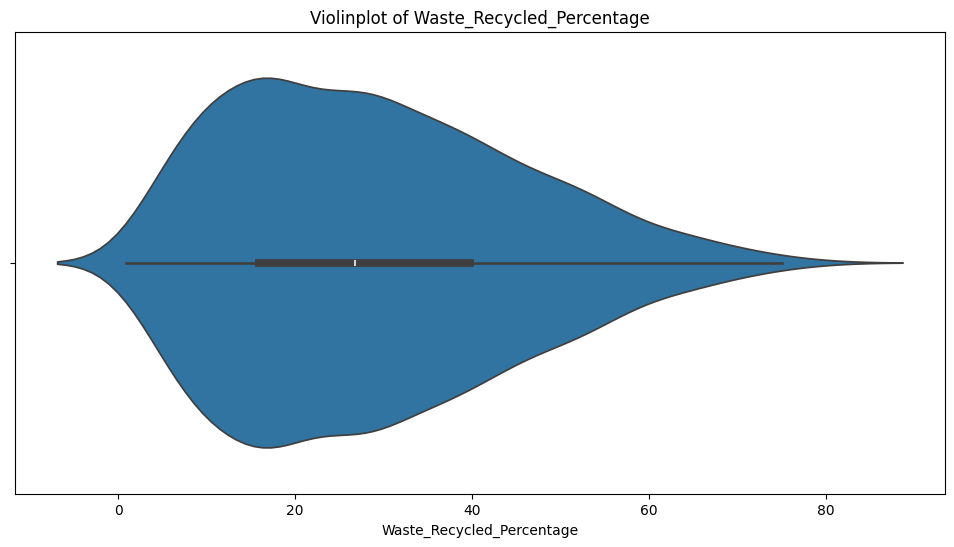

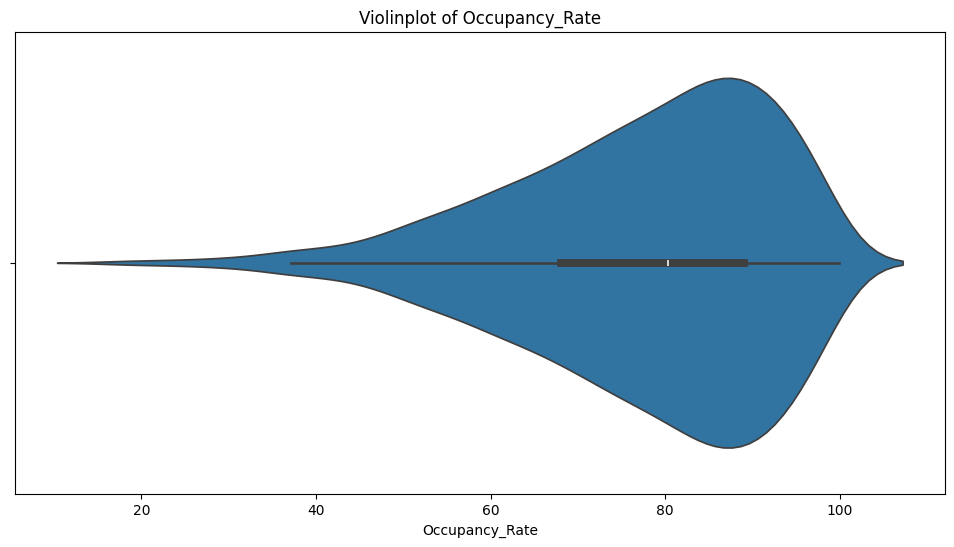

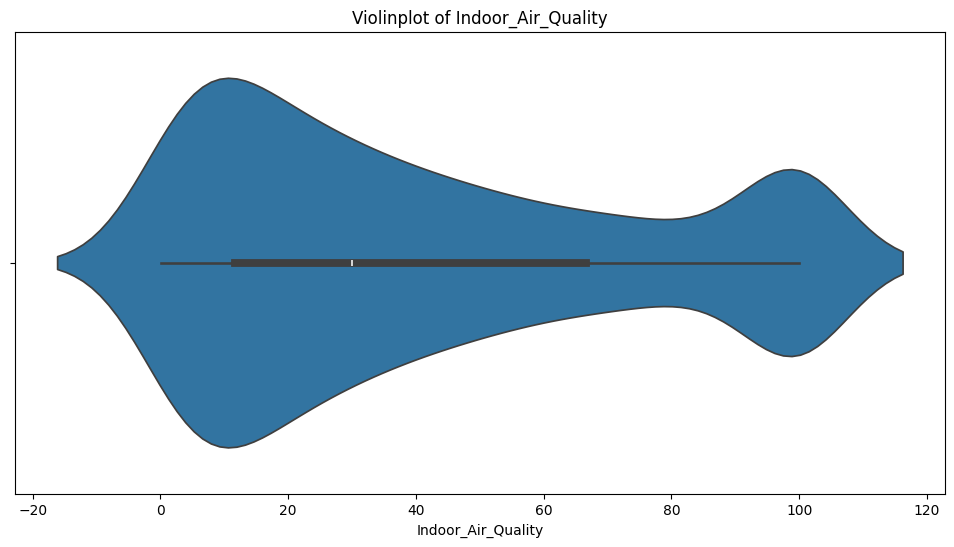

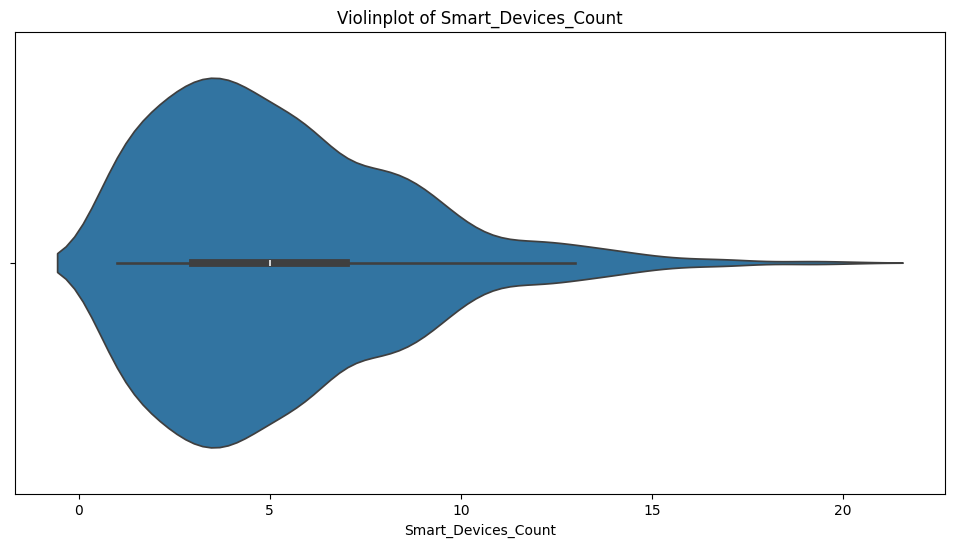

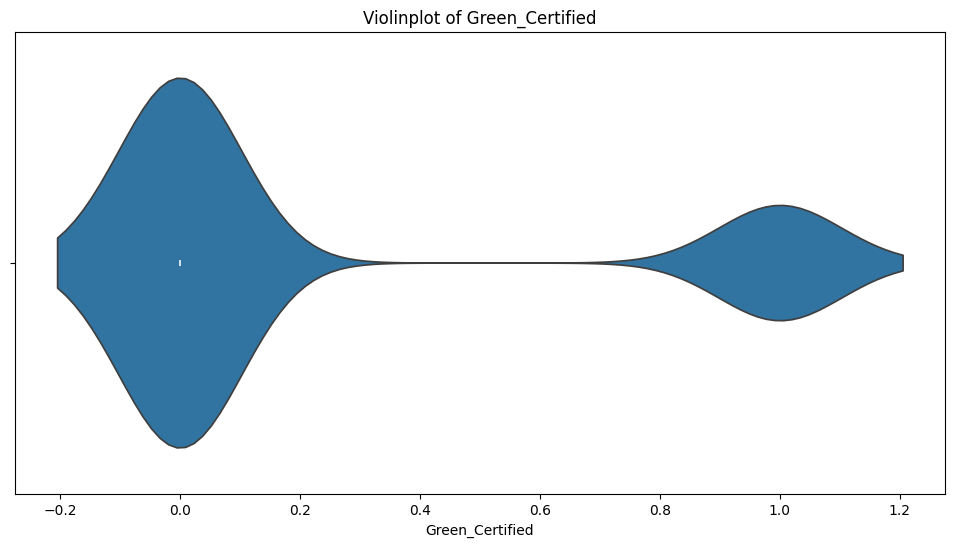

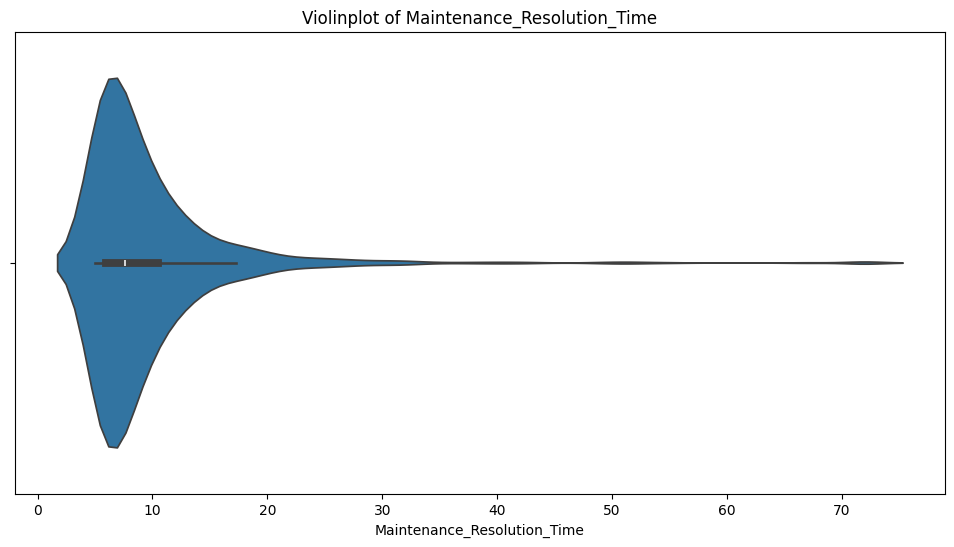

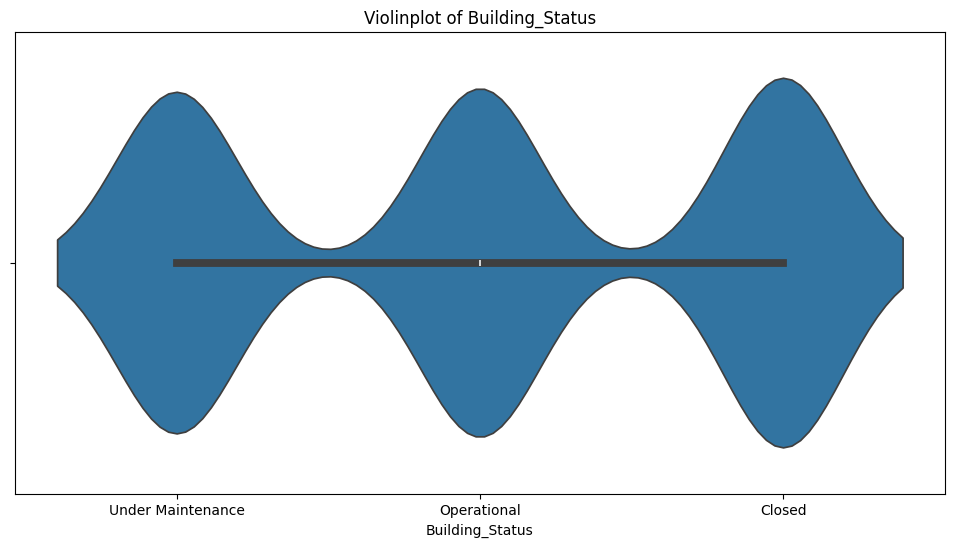

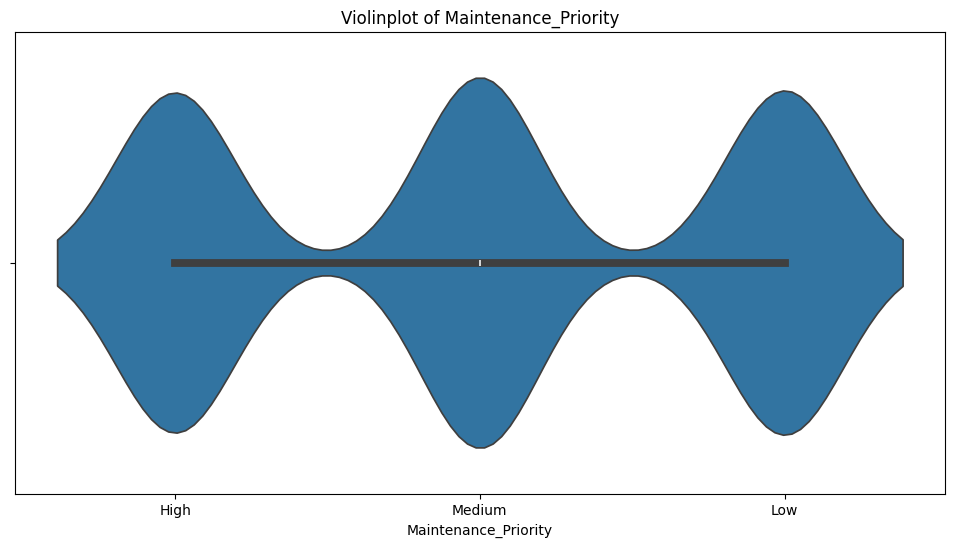

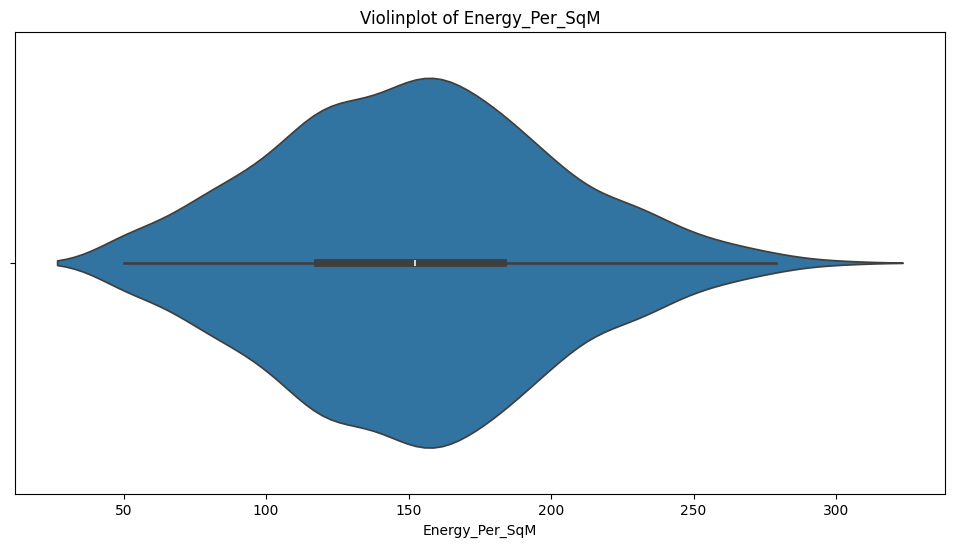

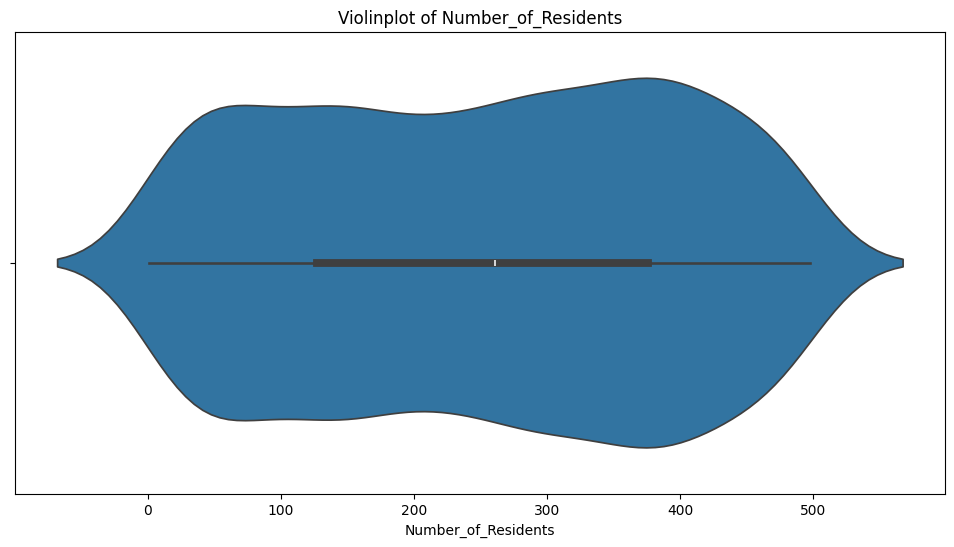

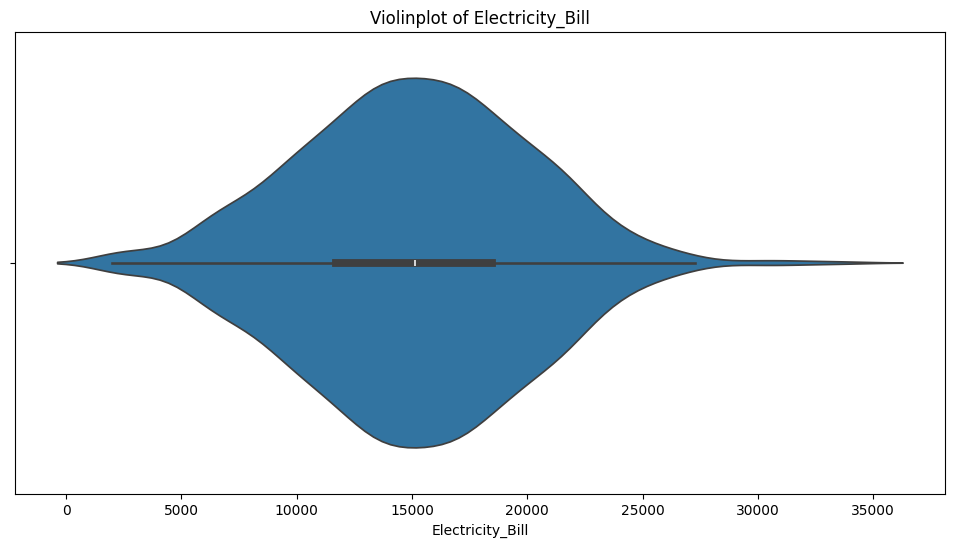

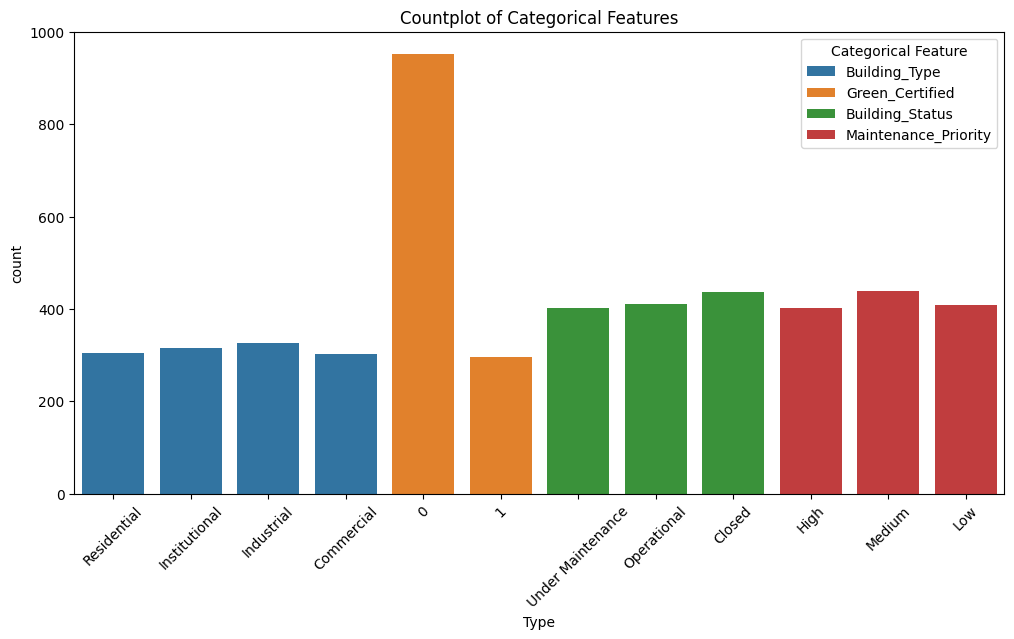

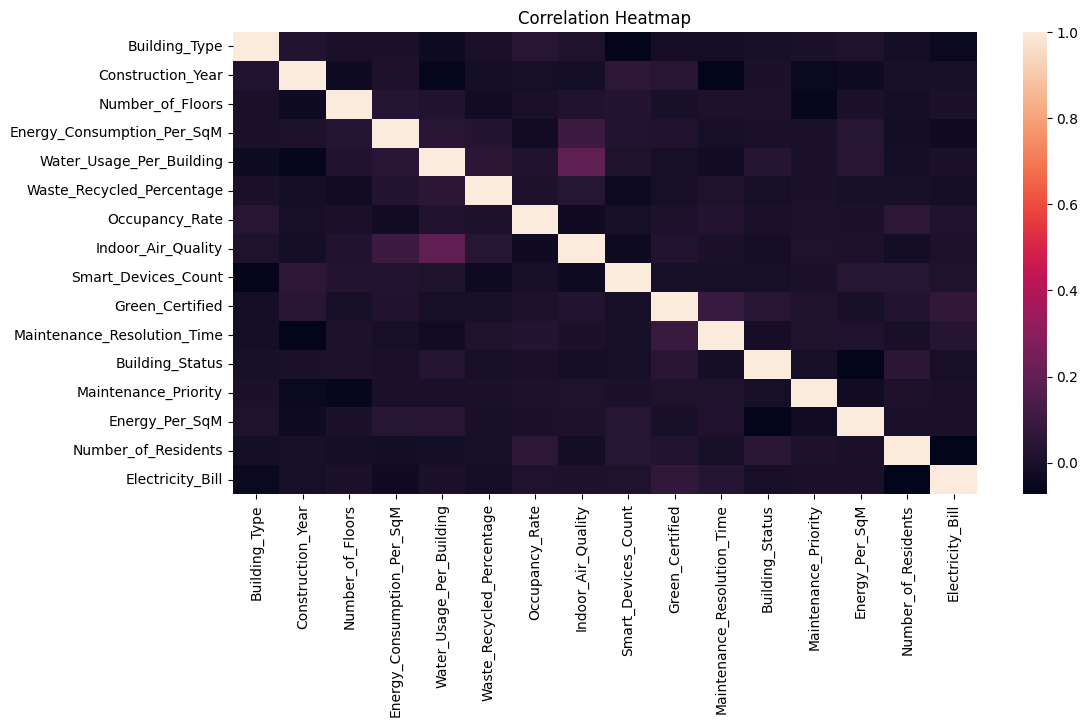

In [21]:
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import copy

x_columns = data.columns.tolist()
x_columns.remove('Electricity_Bill')

sbn.pairplot(data) # Pairplot
plt.title('Pairplot of Data')
plt.show()

plt.figure(figsize=(12, 10))
sbn.boxplot(data) # Box Plot
plt.xticks(rotation=45)
plt.title('Box plot of Data')
plt.show()

# The following are the ones whose boxplots wrt target variable, are too clumsy since they are continuous data, so I omit them.
rem_cols = ['Energy_Consumption_Per_SqM', 'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 'Occupancy_Rate', 'Indoor_Air_Quality', 'Maintenance_Resolution_Time', 'Energy_Per_SqM', 'Number_of_Residents']
displ_cols = copy.deepcopy(x_columns)
for i in rem_cols:
    displ_cols.remove(i)

for i in displ_cols:
    plt.figure(figsize=(12, 6))
    sbn.boxplot(data, x=i, y='Electricity_Bill') # Boxplot
    plt.title(f'Boxplot of {i} vs Electricity Bill')
    plt.xticks(rotation=45)
    plt.show()

tot_columns = copy.deepcopy(x_columns) # List of Columns alongside target variable
tot_columns.append('Electricity_Bill')

for i in tot_columns:
    plt.figure(figsize=(12, 6))
    sbn.boxplot(x = data[i]) # Boxplot
    plt.title(f'Boxplot of {i}')
    plt.show()


plt.figure(figsize=(12, 10))
sbn.violinplot(data) # Violin Plot
plt.xticks(rotation=45)
plt.title('Violinplot of Data')
plt.show()

for i in displ_cols:
    plt.figure(figsize=(12, 6))
    sbn.violinplot(data, x=i, y='Electricity_Bill') # Violinplot
    plt.title(f'Violinplot of {i} vs Electricity Bill')
    plt.xticks(rotation=45)
    plt.show()

for i in tot_columns:
    plt.figure(figsize=(12, 6))
    sbn.violinplot(x = data[i]) # Violinplot
    plt.title(f'Violinplot of {i}')
    plt.show()

# Analyzing the data, I decipher that the categorical features are:-

# Building_Type, Green_Certified, Building_Status, Maintenance_Priority

# I don't consider Construction_Year to be a categorical variable as the the trends and difference between 2 years could be the
# reason, why the electricity bill of one is so high. So, it can be used to analyze trends, and thus, not a categorical variable
# in this use case.

categorical_vars = ['Building_Type', 'Green_Certified', 'Building_Status', 'Maintenance_Priority']
categorical_data = data[categorical_vars]

categorical_data = categorical_data.melt(var_name = 'Categorical Feature', value_name='Type')
plt.figure(figsize=(12, 6))
sbn.countplot(categorical_data, x='Type', hue='Categorical Feature') # Count Plot
plt.title('Countplot of Categorical Features')
plt.xticks(rotation=45)
plt.show()


# Pre-processing categorical non-float or int data into numbers, so that the correlation heatmap can map them.
lbl = LabelEncoder()
labelled_data = data.copy(deep=True)
labelled_data['Building_Type'] = lbl.fit_transform(labelled_data['Building_Type'])
labelled_data['Building_Status'] = lbl.fit_transform(labelled_data['Building_Status'])
labelled_data['Maintenance_Priority'] = lbl.fit_transform(labelled_data['Maintenance_Priority'])

plt.figure(figsize=(12, 6))
sbn.heatmap(labelled_data.corr()) # Correlation Heatmap
plt.title('Correlation Heatmap')
plt.show()

Insights:-

1) Buildings that are green certified have a higher electricity bill than those that don’t on average based on the box plot
2) The dataset itself contains far more buildings that aren’t green certified than those that are green certified.
3) As the maintenance resolution rate increases, the occupancy rate increases (from the pair plot).
4) With a larger number of smart devices, the maintenance resolution time decreases (from the pair plot).
5) The dataset has more samples that have a higher occupancy rate and also, most of its samples have electricity bills that are in the midrange rather than in the extreme, it is not evenly skewed across all values of bills.

Part (b)

c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


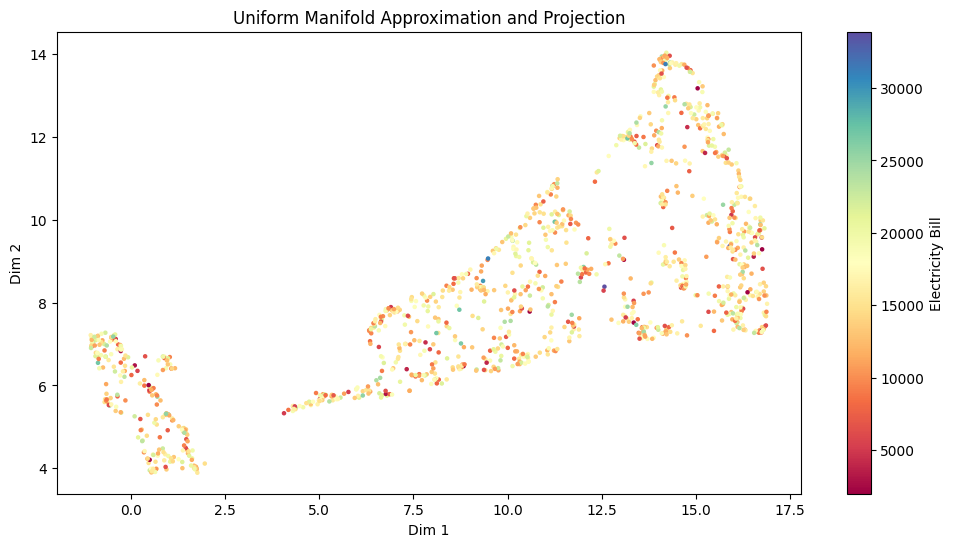

In [4]:
import umap

# First we split the data into features, and labels
x_data = labelled_data[x_columns]
y_data = labelled_data['Electricity_Bill']

tmp = umap.UMAP(n_components=2)
red_data = np.array(tmp.fit_transform(X = x_data, y = y_data))

x1 = red_data[:, 0]
x2 = red_data[:, 1]



plt.figure(figsize=(12, 6))
plt.scatter(x1, x2, c=y_data, cmap='Spectral', s=5)
plt.colorbar(label='Electricity Bill')
plt.title('Uniform Manifold Approximation and Projection')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

2 main clusters have been formed. In terms of the separability between different ranges of electricity bill, there isn’t much. Though, the points with very low bill are clumped together generally. So, not much separability.

Part (c)

In [5]:
# Pre Processing the data where certain rows have NaNs.

columns_na = data.columns[data.isna().any()].tolist()
print("Columns with NaN values:", columns_na)

Columns with NaN values: []


So, No NaNs, so we don't need to handle any missing values.

In [6]:
from sklearn.preprocessing import StandardScaler

column_list = data.columns.to_list()
categorical_vars = ['Building_Type', 'Green_Certified', 'Building_Status', 'Maintenance_Priority']

for i in categorical_vars: # To get a new list of the features having numerical data
    column_list.remove(i)

column_list.remove('Electricity_Bill')

Scaler = StandardScaler()
pre_proc_data = data.copy(deep=True)
pre_proc_data[column_list] = Scaler.fit_transform(pre_proc_data[column_list])


# Analyzing the data, I decipher that the categorical features are:-

# Building_Type, Green_Certified, Building_Status, Maintenance_Priority

# I don't consider Construction_Year to be a categorical variable as the the trends and difference between 2 years could be the
# reason, why the electricity bill of one is so high. So, it can be used to analyze trends, and thus, not a categorical variable
# in this use case.

categorical_vars = ['Building_Type', 'Green_Certified', 'Building_Status', 'Maintenance_Priority']
vars_to_be_transformed = ['Building_Type', 'Building_Status', 'Maintenance_Priority'] # Green_Certified is already in the form of 1s and 0s.


# Pre-processing categorical non-float or int data into numbers, so that the correlation heatmap can map them.
lbl = LabelEncoder()
for i in vars_to_be_transformed:
    pre_proc_data[i] = lbl.fit_transform(pre_proc_data[i])

pre_proc_data.head()

Building_Type  Construction_Year  Number_of_Floors  \
0              3          -0.492995          1.294186   
1              2          -1.066600         -0.296505   
2              1           0.590482          0.763956   
3              0          -0.747930         -1.622080   
4              1           0.590482          1.294186   

   Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
0                   -0.814197                 -0.349153   
1                    1.621769                 -0.921691   
2                   -0.138455                 -0.921691   
3                   -0.558199                 -0.921691   
4                   -0.814197                 -0.618406   

   Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
0                   1.205746        0.300178           -0.793583   
1                   1.081897       -2.132641           -0.900518   
2                  -0.713141       -1.906147           -0.378754   
3                   1.778415       -0.062917           -1.157493   
4                  -0.116644        1.274310           -1.146958   

   Smart_Devices_Count  Green_Certified  Maintenance_Resolution_Time  \
0             0.232814                0                    -0.350170   
1             1.464636                0                     3.568630   
2            -0.999007                1                    -0.493831   
3            -0.999007                0                    -0.624403   
4             4.236234                0                    -0.372132   

   Building_Status  Maintenance_Priority  Energy_Per_SqM  Number_of_Residents  \
0                2                     0        0.467149             0.751504   
1                2                     0       -0.186815            -1.116230   
2                1                     2        0.622638            -0.949592   
3                0                     1        1.524152            -0.644089   
4                0                     2       -0.285571             0.043293   

   Electricity_Bill  
0      16408.008770  
1      15230.425070  
2       8117.632795  
3      13030.707160  
4      25848.853740

In [7]:
# Creating train-test split in 80:20 ratio.

from sklearn.model_selection import train_test_split

column_list = pre_proc_data.columns.to_list()
column_list.remove('Electricity_Bill')
x = pre_proc_data[column_list]
y = pre_proc_data['Electricity_Bill']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19) # 20% test, with random split


# Performing Linear Regression on the New Dataset.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()
reg_line = model.fit(x_train, y_train) # Fitting the model

y_train_pred = model.predict(x_train) # Finding out predictions of model on train set.
y_test_pred = model.predict(x_test) # Finding out predictions of model on test set.

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE Error -> Train : {mse_train}, Test : {mse_test}")

rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f"RMSE Error -> Train : {rmse_train}, Test : {rmse_test}")

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 Score -> Train : {r2_train}, Test : {r2_test}")

n_obs_train = len(y_train)
n_obs_test = len(y_test)
n_regressors = len(column_list)

# Adjusted R2 Score -> 1 - (((1 - r2 score) * (sample size - 1)) / (sample size - no. of regressors - 1))
r2_adj_train = 1 - (((1-r2_train) * (n_obs_train-1)) / (n_obs_train - n_regressors - 1))
r2_adj_test = 1 - (((1-r2_test) * (n_obs_test-1)) / (n_obs_test - n_regressors - 1))

print(f"Adjusted R2 Score -> Train : {r2_adj_train}, Test : {r2_adj_test}")

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"MAE Error -> Train : {mae_train}, Test : {mae_test}")

MSE Error -> Train : 24655148.257489815, Test : 23366790.69266435
RMSE Error -> Train : 4965.395075670194, Test : 4833.9208405459385
R2 Score -> Train : 0.018294250744540497, Test : -0.008382098814608385
Adjusted R2 Score -> Train : 0.0033292240790609995, Test : -0.0730219769437499
MAE Error -> Train : 4002.8327810662854, Test : 3846.6264309277353


Part (d) -> Selecting 3 Most Important Features

In [8]:
from sklearn.feature_selection import RFE

# Model which we will use to recursively keep fitting and eliminating feature with least correlation.
# Using linear regression because we used in last part to see scores with it.
model = LinearRegression()

selected_model = RFE(model, n_features_to_select=3, step=1)
selected_model = selected_model.fit(x, y)

result = selected_model.support_ # Tells which all features to include as the top 3.
idx_key_feature = [i for i in range(len(result)) if result[i] == True] # Indices of those features.

list_key_features = []
for i in idx_key_feature:
    list_key_features.append(column_list[i])

print(list_key_features)


['Building_Type', 'Green_Certified', 'Number_of_Residents']


In [9]:
# Training a regression model on only these 3 features

rfe_x_train = x_train[list_key_features]
rfe_x_test = x_test[list_key_features]

rfe_y_train = y_train
rfe_y_test = y_test

model = LinearRegression()
reg_line = model.fit(rfe_x_train, rfe_y_train) # Fitting the model

rfe_y_train_pred = model.predict(rfe_x_train) # Finding out predictions of model on train set.
rfe_y_test_pred = model.predict(rfe_x_test) # Finding out predictions of model on test set.

rfe_mse_train = mean_squared_error(rfe_y_train, rfe_y_train_pred)
rfe_mse_test = mean_squared_error(rfe_y_test, rfe_y_test_pred)

print(f"MSE Error -> Train : {rfe_mse_train}, Test : {rfe_mse_test}")

rfe_rmse_train = root_mean_squared_error(rfe_y_train, rfe_y_train_pred)
rfe_rmse_test = root_mean_squared_error(rfe_y_test, rfe_y_test_pred)

print(f"RMSE Error -> Train : {rfe_rmse_train}, Test : {rfe_rmse_test}")

rfe_r2_train = r2_score(rfe_y_train, rfe_y_train_pred)
rfe_r2_test = r2_score(rfe_y_test, rfe_y_test_pred)

print(f"R2 Score -> Train : {rfe_r2_train}, Test : {rfe_r2_test}")

rfe_n_obs_train = len(rfe_y_train)
rfe_n_obs_test = len(rfe_y_test)
rfe_n_regressors = len(list_key_features)

# Adjusted R2 Score -> 1 - (((1 - r2 score) * (sample size - 1)) / (sample size - no. of regressors - 1))
rfe_r2_adj_train = 1 - (((1-rfe_r2_train) * (rfe_n_obs_train-1)) / (rfe_n_obs_train - rfe_n_regressors - 1))
rfe_r2_adj_test = 1 - (((1-rfe_r2_test) * (rfe_n_obs_test-1)) / (rfe_n_obs_test - rfe_n_regressors - 1))

print(f"Adjusted R2 Score -> Train : {rfe_r2_adj_train}, Test : {rfe_r2_adj_test}")

rfe_mae_train = mean_absolute_error(rfe_y_train, rfe_y_train_pred)
rfe_mae_test = mean_absolute_error(rfe_y_test, rfe_y_test_pred)

print(f"MAE Error -> Train : {rfe_mae_train}, Test : {rfe_mae_test}")

MSE Error -> Train : 24766070.56264958, Test : 23136682.2904276
RMSE Error -> Train : 4976.552075749793, Test : 4810.060528769633
R2 Score -> Train : 0.013877604632386964, Test : 0.0015481135390811307
Adjusted R2 Score -> Train : 0.010907356453568773, Test : -0.010628128978735107
MAE Error -> Train : 4008.6773071820185, Test : 3814.805127504474


In [10]:
# Comparing (c) and (d)

print(f'''
                                                            Metrics
                           Without Feature Elimination                              With Feature Elimination
                        Train                       Test                       Train                    Test
MSE Error          {mse_train}       {mse_test}          {rfe_mse_train}         {rfe_mse_test}
RMSE Error         {rmse_train}        {rmse_test}         {rfe_rmse_train}         {rfe_rmse_test}
R2 Score           {r2_train}    {r2_test}       {rfe_r2_train}      {rfe_r2_test}
Adj. R2 Score      {r2_adj_train}   {r2_adj_test}         {rfe_r2_adj_train}     {rfe_r2_adj_test}
MAE Error          {mae_train}       {mae_test}         {rfe_mae_train}        {rfe_mae_test}
''')


                                                            Metrics
                           Without Feature Elimination                              With Feature Elimination
                        Train                       Test                       Train                    Test
MSE Error          24655148.257489815       23366790.69266435          24766070.56264958         23136682.2904276
RMSE Error         4965.395075670194        4833.9208405459385         4976.552075749793         4810.060528769633
R2 Score           0.018294250744540497    -0.008382098814608385       0.013877604632386964      0.0015481135390811307
Adj. R2 Score      0.0033292240790609995   -0.0730219769437499         0.010907356453568773     -0.010628128978735107
MAE Error          4002.8327810662854       3846.6264309277353         4008.6773071820185        3814.805127504474



With Feature Elimination, the MSE, RMSE and MAE errors are lower on test set but higher on train set. So, with feature elimination, the model generalizes better. And the R2 as well as the Adjusted R2 scores are higher for test set for Feature Eliminated model, which means that the fit is better.

Part (e) -> One-Hot Encoding

In [11]:
# Assuming that we don't have to normalize any of the numerical data, since the question states to perform changes on the original dataset.

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

# https://www.geeksforgeeks.org/ml-one-hot-encoding/ -> Link I used to learn how to use One Hot Encoding on Multiple Columns while keeping some intact

# Ideally, we did not need to encode Green_Certified (since it's already in 0s and 1s), but since questions asked us to encode all categorical features, i have done so.
model = OneHotEncoder(sparse_output=False)
ohe_data = model.fit_transform(data[categorical_vars])
ohe_dataframe = pd.DataFrame(ohe_data, columns = model.get_feature_names_out(categorical_vars))
enc_data = pd.concat([data, ohe_dataframe], axis=1)
enc_data = enc_data.drop(categorical_vars, axis=1)

# Pre-Processing of Numerical Data

new_column_list = data.columns.to_list()
categorical_vars = ['Building_Type', 'Green_Certified', 'Building_Status', 'Maintenance_Priority']

for i in categorical_vars: # To get a new list of the features having numerical data
    new_column_list.remove(i)

new_column_list.remove('Electricity_Bill')

Scaler = StandardScaler()
enc_data[new_column_list] = Scaler.fit_transform(enc_data[new_column_list])

pd.set_option('display.max_columns', None)
enc_data.head()

Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0          -0.492995          1.294186                   -0.814197   
1          -1.066600         -0.296505                    1.621769   
2           0.590482          0.763956                   -0.138455   
3          -0.747930         -1.622080                   -0.558199   
4           0.590482          1.294186                   -0.814197   

   Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                 -0.349153                   1.205746        0.300178   
1                 -0.921691                   1.081897       -2.132641   
2                 -0.921691                  -0.713141       -1.906147   
3                 -0.921691                   1.778415       -0.062917   
4                 -0.618406                  -0.116644        1.274310   

   Indoor_Air_Quality  Smart_Devices_Count  Maintenance_Resolution_Time  \
0           -0.793583             0.232814                    -0.350170   
1           -0.900518             1.464636                     3.568630   
2           -0.378754            -0.999007                    -0.493831   
3           -1.157493            -0.999007                    -0.624403   
4           -1.146958             4.236234                    -0.372132   

   Energy_Per_SqM  Number_of_Residents  Electricity_Bill  \
0        0.467149             0.751504      16408.008770   
1       -0.186815            -1.116230      15230.425070   
2        0.622638            -0.949592       8117.632795   
3        1.524152            -0.644089      13030.707160   
4       -0.285571             0.043293      25848.853740   

   Building_Type_Commercial  Building_Type_Industrial  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       1.0   
3                       1.0                       0.0   
4                       0.0                       1.0   

   Building_Type_Institutional  Building_Type_Residential  Green_Certified_0  \
0                          0.0                        1.0                1.0   
1                          1.0                        0.0                1.0   
2                          0.0                        0.0                0.0   
3                          0.0                        0.0                1.0   
4                          0.0                        0.0                1.0   

   Green_Certified_1  Building_Status_Closed  Building_Status_Operational  \
0                0.0                     0.0                          0.0   
1                0.0                     0.0                          0.0   
2                1.0                     0.0                          1.0   
3                0.0                     1.0                          0.0   
4                0.0                     1.0                          0.0   

   Building_Status_Under Maintenance  Maintenance_Priority_High  \
0                                1.0                        1.0   
1                                1.0                        1.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                0.0                        0.0   

   Maintenance_Priority_Low  Maintenance_Priority_Medium  
0                       0.0                          0.0  
1                       0.0                          0.0  
2                       0.0                          1.0  
3                       1.0                          0.0  
4                       0.0                          1.0

In [12]:
# Creating train-test split in 80:20 ratio.

from sklearn.model_selection import train_test_split

ohe_column_list = enc_data.columns.to_list()
ohe_column_list.remove('Electricity_Bill')
ohe_x = enc_data[ohe_column_list]
ohe_y = enc_data['Electricity_Bill']

# By using the same random state, no change in the datapoints used as test and train in comparison of any of the parts.
ohe_x_train, ohe_x_test, ohe_y_train, ohe_y_test = train_test_split(ohe_x, ohe_y, test_size=0.2, random_state=19) # 20% test, with random split

# Performing Ridge Regression on the New Dataset.

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

model = Ridge()
reg_line = model.fit(ohe_x_train, ohe_y_train) # Fitting the model

ohe_y_train_pred = model.predict(ohe_x_train) # Finding out predictions of model on train set.
ohe_y_test_pred = model.predict(ohe_x_test) # Finding out predictions of model on test set.

ohe_mse_train = mean_squared_error(ohe_y_train, ohe_y_train_pred)
ohe_mse_test = mean_squared_error(ohe_y_test, ohe_y_test_pred)

print(f"MSE Error -> Train : {ohe_mse_train}, Test : {ohe_mse_test}")

ohe_rmse_train = root_mean_squared_error(ohe_y_train, ohe_y_train_pred)
ohe_rmse_test = root_mean_squared_error(ohe_y_test, ohe_y_test_pred)

print(f"RMSE Error -> Train : {ohe_rmse_train}, Test : {ohe_rmse_test}")

ohe_r2_train = r2_score(ohe_y_train, ohe_y_train_pred)
ohe_r2_test = r2_score(ohe_y_test, ohe_y_test_pred)

print(f"R2 Score -> Train : {ohe_r2_train}, Test : {ohe_r2_test}")

ohe_n_obs_train = len(ohe_y_train)
ohe_n_obs_test = len(ohe_y_test)
ohe_n_regressors = len(ohe_column_list)

# Adjusted R2 Score -> 1 - (((1 - r2 score) * (sample size - 1)) / (sample size - no. of regressors - 1))
ohe_r2_adj_train = 1 - (((1-ohe_r2_train) * (ohe_n_obs_train-1)) / (ohe_n_obs_train - ohe_n_regressors - 1))
ohe_r2_adj_test = 1 - (((1-ohe_r2_test) * (ohe_n_obs_test-1)) / (ohe_n_obs_test - ohe_n_regressors - 1))

print(f"Adjusted R2 Score -> Train : {ohe_r2_adj_train}, Test : {ohe_r2_adj_test}")

ohe_mae_train = mean_absolute_error(ohe_y_train, ohe_y_train_pred)
ohe_mae_test = mean_absolute_error(ohe_y_test, ohe_y_test_pred)

print(f"MAE Error -> Train : {ohe_mae_train}, Test : {ohe_mae_test}")

MSE Error -> Train : 24292870.059935816, Test : 23495181.827085067
RMSE Error -> Train : 4928.779773933485, Test : 4847.182875349873
R2 Score -> Train : 0.032719253817098726, Test : -0.013922753639620034
Adjusted R2 Score -> Train : 0.009924728036149189, Test : -0.11710958254984671
MAE Error -> Train : 3959.326160703784, Test : 3843.5596807397287


In [13]:
# Comparing (c) and (e)

print(f'''
                                                            Metrics
      
                                Label Encoding                                      One Hot Encoding
      
                        Train                       Test                       Train                    Test
MSE Error         {mse_train}       {mse_test}          {ohe_mse_train}         {ohe_mse_test}
RMSE Error        {rmse_train}        {rmse_test}         {ohe_rmse_train}          {ohe_rmse_test}
R2 Score          {r2_train}    {r2_test}       {ohe_r2_train}      {ohe_r2_test}
Adj. R2 Score     {r2_adj_train}   {r2_adj_test}         {ohe_r2_adj_train}      {ohe_r2_adj_test}
MAE Error         {mae_train}       {mae_test}         {ohe_mae_train}          {ohe_mae_test}
''')


                                                            Metrics
      
                                Label Encoding                                      One Hot Encoding
      
                        Train                       Test                       Train                    Test
MSE Error         24655148.257489815       23366790.69266435          24292870.059935816         23495181.827085067
RMSE Error        4965.395075670194        4833.9208405459385         4928.779773933485          4847.182875349873
R2 Score          0.018294250744540497    -0.008382098814608385       0.032719253817098726      -0.013922753639620034
Adj. R2 Score     0.0033292240790609995   -0.0730219769437499         0.009924728036149189      -0.11710958254984671
MAE Error         4002.8327810662854       3846.6264309277353         3959.326160703784          3843.5596807397287



Discuss

Part (f) -> ICA

NO OF COMPONENTS -> 4

MSE Error -> Train : 25037304.292789903, Test : 23250324.30036188
RMSE Error -> Train : 5003.729038706023, Test : 4821.859008760198
R2 Score -> Train : 0.003077762364560921, Test : -0.003356050237547814
Adjusted R2 Score -> Train : -0.0009299652239231904, Test : -0.019737373506732325
MAE Error -> Train : 4016.5298893470813, Test : 3830.5786896652025

NO OF COMPONENTS -> 5

MSE Error -> Train : 25037264.18551833, Test : 23251685.132673226
RMSE Error -> Train : 5003.725030966263, Test : 4822.000117448488
R2 Score -> Train : 0.003079359334843712, Test : -0.003414776271443598
Adjusted R2 Score -> Train : -0.001935332016590685, Test : -0.023976554473727374
MAE Error -> Train : 4016.739494535791, Test : 3831.0940288782604

NO OF COMPONENTS -> 6

MSE Error -> Train : 25035442.200514406, Test : 23273726.03685368
RMSE Error -> Train : 5003.542964791489, Test : 4824.28502856679
R2 Score -> Train : 0.003151906177180086, Test : -0.004365940404746471
Adjusted R2 Score -> Trai

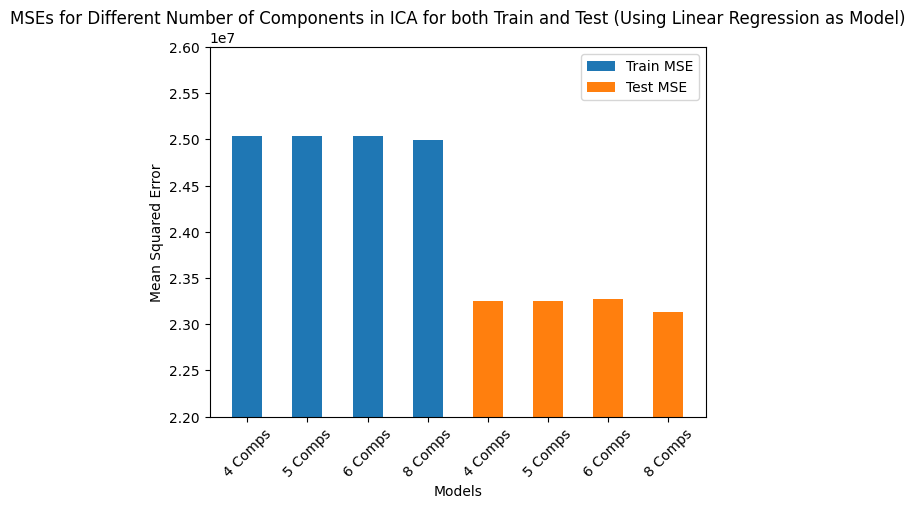

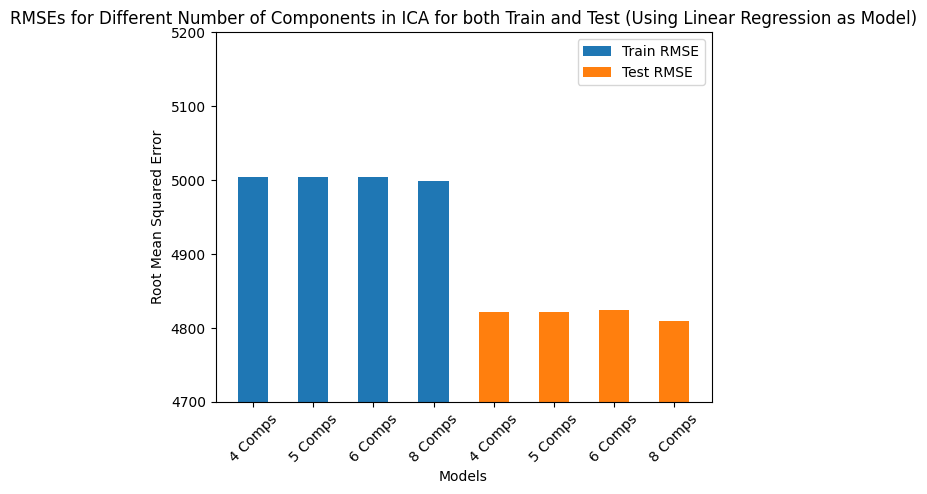

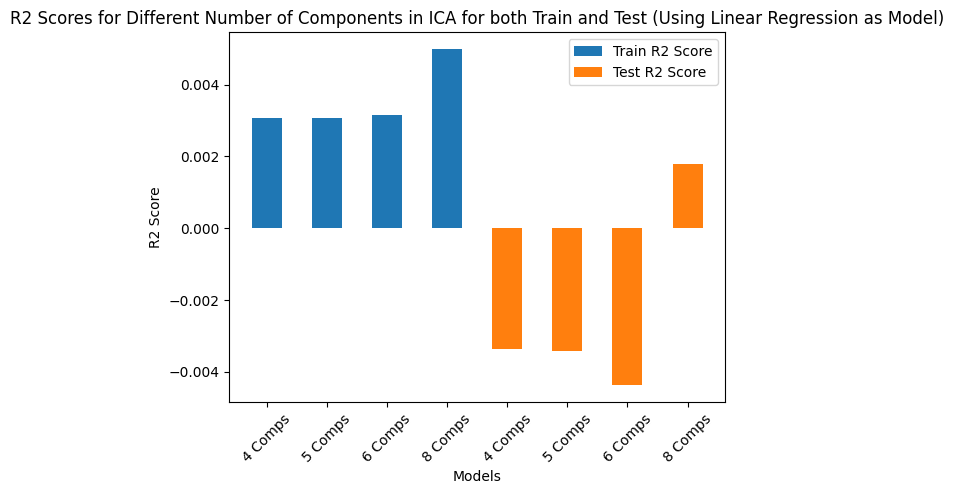

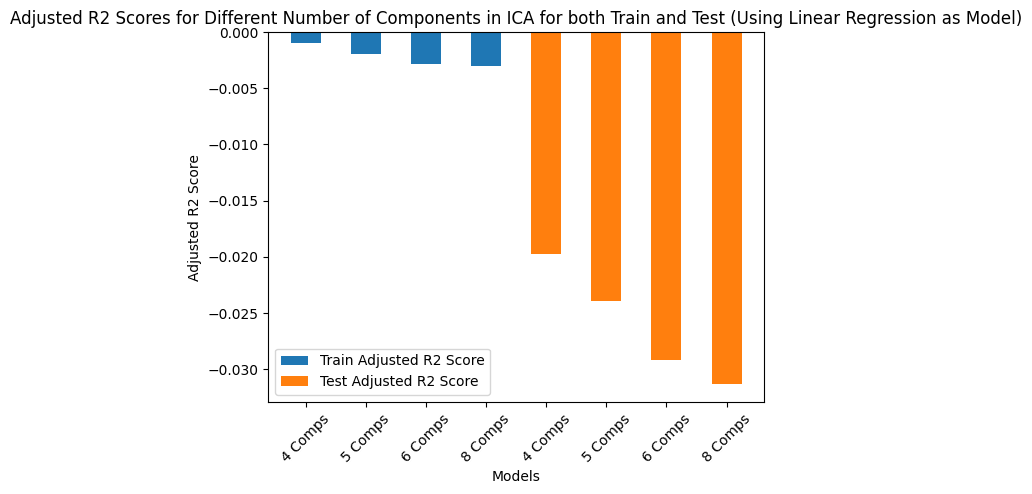

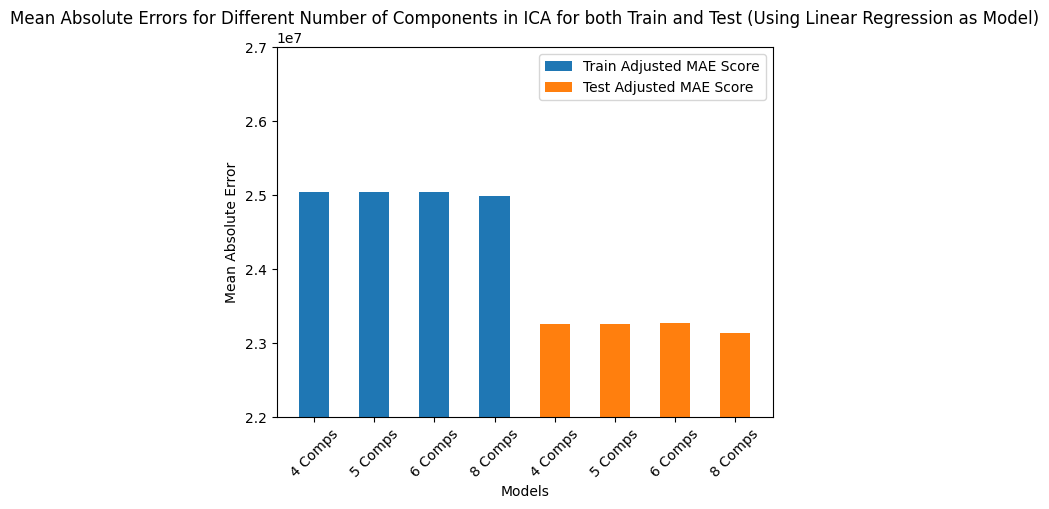

In [14]:
# Using both ridge and linear regression as not specified in question properly.

# Here, we try linear regression.

from sklearn.decomposition import FastICA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

l_n_components = [4, 5, 6, 8]

train_mses = []
test_mses = []

train_rmses = []
test_rmses = []

train_r2s = []
test_r2s = []

train_adj_r2s = []
test_adj_r2s = []

train_maes = []
test_maes = []

for i in l_n_components:
    print(f"NO OF COMPONENTS -> {i}\n")
    model = FastICA(n_components=i,random_state=19)
    ica_x = model.fit_transform(ohe_x)

    ica_x_train, ica_x_test, ica_y_train, ica_y_test = train_test_split(ica_x, ohe_y, test_size=0.2, random_state=19)

    model2 = LinearRegression()
    reg_line = model2.fit(ica_x_train, ica_y_train) # Fitting the model

    ica_y_train_pred = model2.predict(ica_x_train) # Finding out predictions of model on train set.
    ica_y_test_pred = model2.predict(ica_x_test) # Finding out predictions of model on test set.

    ica_mse_train = mean_squared_error(ica_y_train, ica_y_train_pred)
    ica_mse_test = mean_squared_error(ica_y_test, ica_y_test_pred)

    print(f"MSE Error -> Train : {ica_mse_train}, Test : {ica_mse_test}")
    train_mses.append(ica_mse_train)
    test_mses.append(ica_mse_test)

    ica_rmse_train = root_mean_squared_error(ica_y_train, ica_y_train_pred)
    ica_rmse_test = root_mean_squared_error(ica_y_test, ica_y_test_pred)

    print(f"RMSE Error -> Train : {ica_rmse_train}, Test : {ica_rmse_test}")
    train_rmses.append(ica_rmse_train)
    test_rmses.append(ica_rmse_test)

    ica_r2_train = r2_score(ica_y_train, ica_y_train_pred)
    ica_r2_test = r2_score(ica_y_test, ica_y_test_pred)

    print(f"R2 Score -> Train : {ica_r2_train}, Test : {ica_r2_test}")
    train_r2s.append(ica_r2_train)
    test_r2s.append(ica_r2_test)

    ica_n_obs_train = len(ica_y_train)
    ica_n_obs_test = len(ica_y_test)
    ica_n_regressors = i

    # Adjusted R2 Score -> 1 - (((1 - r2 score) * (sample size - 1)) / (sample size - no. of regressors - 1))
    ica_r2_adj_train = 1 - (((1-ica_r2_train) * (ica_n_obs_train-1)) / (ica_n_obs_train - ica_n_regressors - 1))
    ica_r2_adj_test = 1 - (((1-ica_r2_test) * (ica_n_obs_test-1)) / (ica_n_obs_test - ica_n_regressors - 1))

    print(f"Adjusted R2 Score -> Train : {ica_r2_adj_train}, Test : {ica_r2_adj_test}")
    train_adj_r2s.append(ica_r2_adj_train)
    test_adj_r2s.append(ica_r2_adj_test)

    ica_mae_train = mean_absolute_error(ica_y_train, ica_y_train_pred)
    ica_mae_test = mean_absolute_error(ica_y_test, ica_y_test_pred)

    print(f"MAE Error -> Train : {ica_mae_train}, Test : {ica_mae_test}\n")
    train_maes.append(ica_mse_train)
    test_maes.append(ica_mse_test)

models = ['4 Comps', '5 Comps', '6 Comps', '8 Comps']

# MSEs
ran1 = np.arange(4) # Arranging the positions where the bars are going to go.
ran2 = np.arange(4) + 4
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_mses, 0.5, label='Train MSE') # The Bar
bar2 = ax.bar(ran2, test_mses, 0.5, label='Test MSE')
ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('MSEs for Different Number of Components in ICA for both Train and Test (Using Linear Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.ylim((2.2*1e7,2.6*1e7))
plt.show()

# RMSEs
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_rmses, 0.5, label='Train RMSE') # The Bar
bar2 = ax.bar(ran2, test_rmses, 0.5, label='Test RMSE')
ax.set_xlabel('Models')
ax.set_ylabel('Root Mean Squared Error')
ax.set_title('RMSEs for Different Number of Components in ICA for both Train and Test (Using Linear Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.ylim((4700, 5200))
plt.show()

# R2 Scores
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_r2s, 0.5, label='Train R2 Score') # The Bar
bar2 = ax.bar(ran2, test_r2s, 0.5, label='Test R2 Score')
ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Scores for Different Number of Components in ICA for both Train and Test (Using Linear Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.show()

# Adjusted R2 Scores
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_adj_r2s, 0.5, label='Train Adjusted R2 Score') # The Bar
bar2 = ax.bar(ran2, test_adj_r2s, 0.5, label='Test Adjusted R2 Score')
ax.set_xlabel('Models')
ax.set_ylabel('Adjusted R2 Score')
ax.set_title('Adjusted R2 Scores for Different Number of Components in ICA for both Train and Test (Using Linear Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.show()

# Adjusted MAE Scores
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_maes, 0.5, label='Train Adjusted MAE Score') # The Bar
bar2 = ax.bar(ran2, test_maes, 0.5, label='Test Adjusted MAE Score')
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Mean Absolute Errors for Different Number of Components in ICA for both Train and Test (Using Linear Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.ylim((2.2*1e7, 2.7*1e7))
plt.show()

ICA with 8 components has the least errors and best R2 score for test set, but doesn’t have a good adjusted R2 score. 4 components has the best adjusted R2 score. For the train set, it is also 8 components that has the least errors and best R2 score but 4 components has the best adjusted R2 score.

NO OF COMPONENTS -> 4

MSE Error -> Train : 25037304.369034607, Test : 23250171.996765994
RMSE Error -> Train : 5003.729046324812, Test : 4821.843215697291
R2 Score -> Train : 0.0030777593286892557, Test : -0.003349477652476507
Adjusted R2 Score -> Train : -0.0009299682719994262, Test : -0.019730693614149475
MAE Error -> Train : 4016.5216111919294, Test : 3830.553651950557

NO OF COMPONENTS -> 5

MSE Error -> Train : 25037264.262147732, Test : 23251528.586014874
RMSE Error -> Train : 5003.725038623498, Test : 4821.983884877144
R2 Score -> Train : 0.003079356283654633, Test : -0.0034080205791455764
Adjusted R2 Score -> Train : -0.0019353350831279315, Test : -0.02396966034511161
MAE Error -> Train : 4016.731240497645, Test : 3831.067659301856

NO OF COMPONENTS -> 6

MSE Error -> Train : 25035442.27885859, Test : 23273545.11039176
RMSE Error -> Train : 5003.54297262036, Test : 4824.266276895561
R2 Score -> Train : 0.003151903057712402, Test : -0.0043581326142885235
Adjusted R2 Score -> Tr

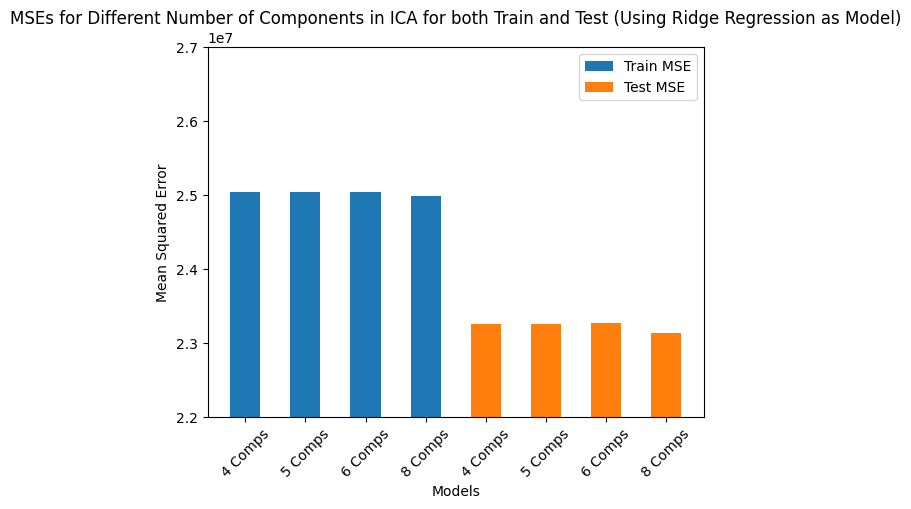

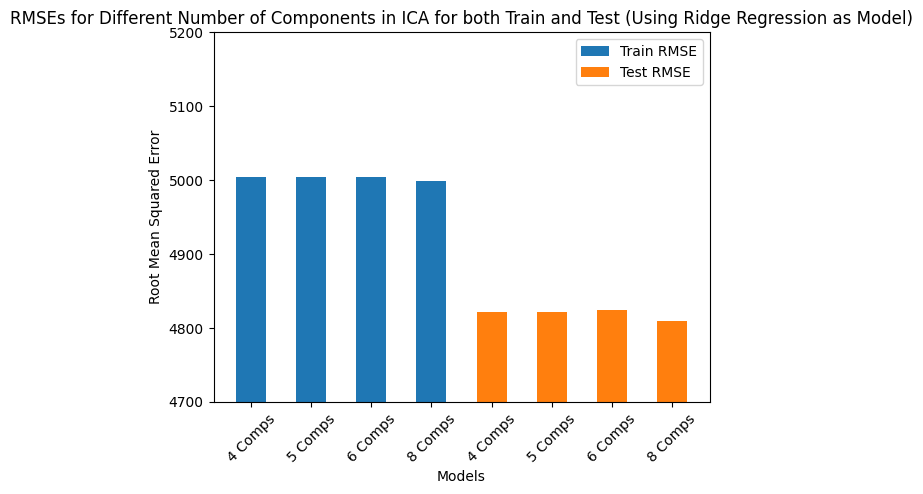

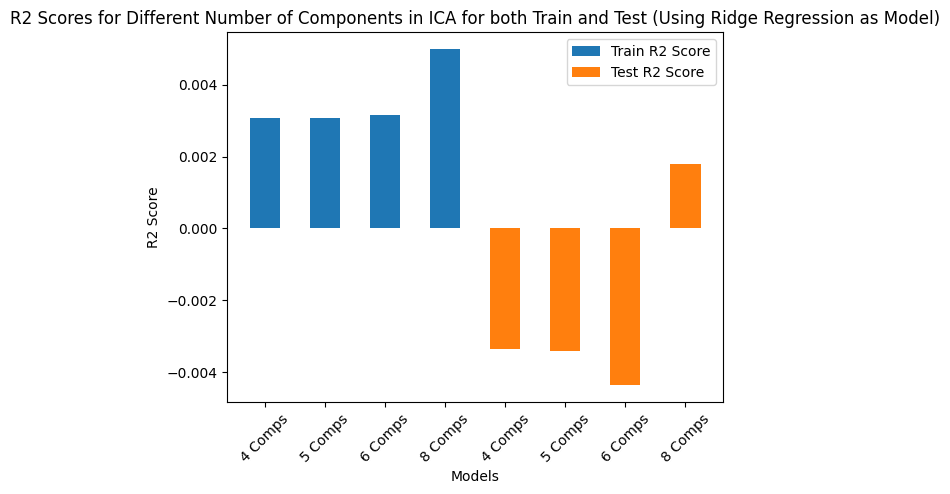

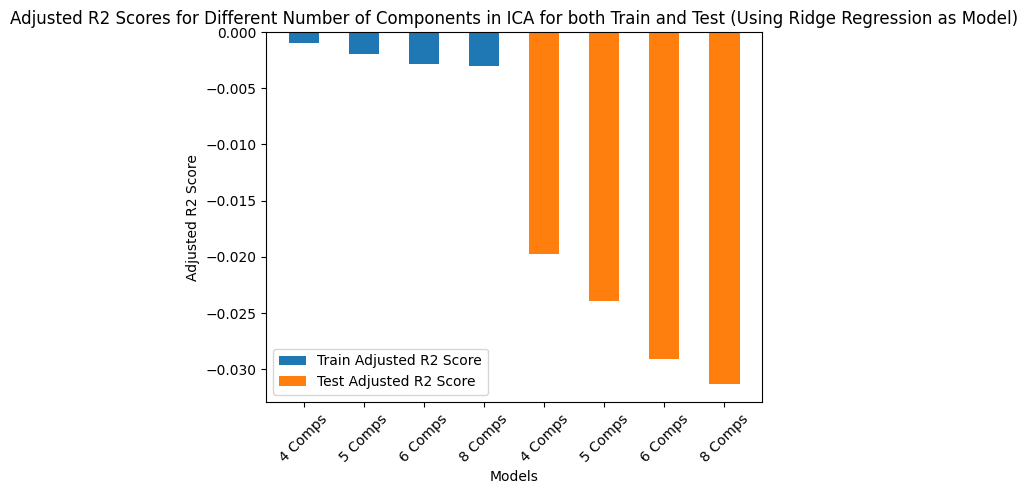

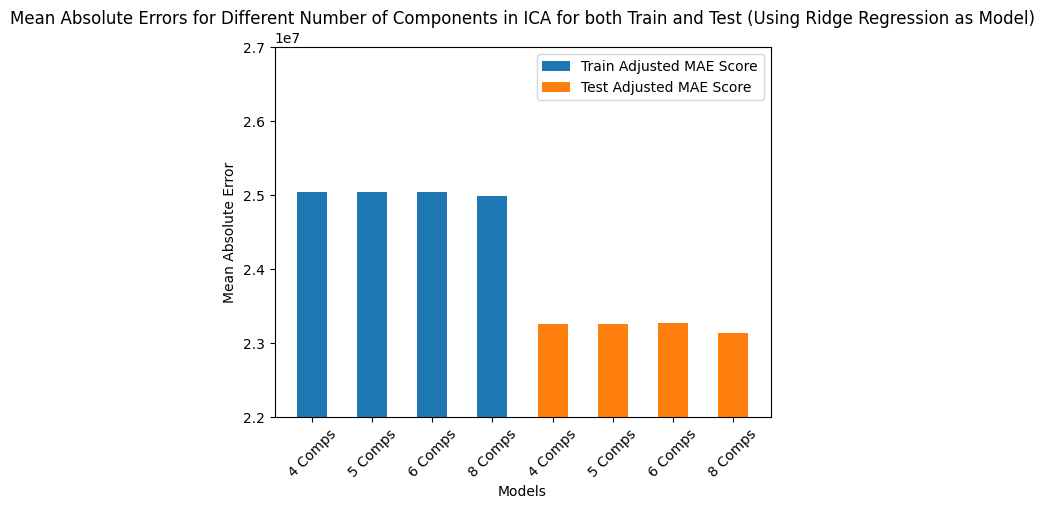

In [15]:
# Here, we try ridge regression.

from sklearn.decomposition import FastICA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

l_n_components = [4, 5, 6, 8]

train_mses = []
test_mses = []

train_rmses = []
test_rmses = []

train_r2s = []
test_r2s = []

train_adj_r2s = []
test_adj_r2s = []

train_maes = []
test_maes = []

for i in l_n_components:
    print(f"NO OF COMPONENTS -> {i}\n")
    model = FastICA(n_components=i,random_state=19)
    ica_x = model.fit_transform(ohe_x)

    ica_x_train, ica_x_test, ica_y_train, ica_y_test = train_test_split(ica_x, ohe_y, test_size=0.2, random_state=19)

    model2 = Ridge()
    reg_line = model2.fit(ica_x_train, ica_y_train) # Fitting the model

    ica_y_train_pred = model2.predict(ica_x_train) # Finding out predictions of model on train set.
    ica_y_test_pred = model2.predict(ica_x_test) # Finding out predictions of model on test set.

    ica_mse_train = mean_squared_error(ica_y_train, ica_y_train_pred)
    ica_mse_test = mean_squared_error(ica_y_test, ica_y_test_pred)

    print(f"MSE Error -> Train : {ica_mse_train}, Test : {ica_mse_test}")
    train_mses.append(ica_mse_train)
    test_mses.append(ica_mse_test)

    ica_rmse_train = root_mean_squared_error(ica_y_train, ica_y_train_pred)
    ica_rmse_test = root_mean_squared_error(ica_y_test, ica_y_test_pred)

    print(f"RMSE Error -> Train : {ica_rmse_train}, Test : {ica_rmse_test}")
    train_rmses.append(ica_rmse_train)
    test_rmses.append(ica_rmse_test)

    ica_r2_train = r2_score(ica_y_train, ica_y_train_pred)
    ica_r2_test = r2_score(ica_y_test, ica_y_test_pred)

    print(f"R2 Score -> Train : {ica_r2_train}, Test : {ica_r2_test}")
    train_r2s.append(ica_r2_train)
    test_r2s.append(ica_r2_test)

    ica_n_obs_train = len(ica_y_train)
    ica_n_obs_test = len(ica_y_test)
    ica_n_regressors = i

    # Adjusted R2 Score -> 1 - (((1 - r2 score) * (sample size - 1)) / (sample size - no. of regressors - 1))
    ica_r2_adj_train = 1 - (((1-ica_r2_train) * (ica_n_obs_train-1)) / (ica_n_obs_train - ica_n_regressors - 1))
    ica_r2_adj_test = 1 - (((1-ica_r2_test) * (ica_n_obs_test-1)) / (ica_n_obs_test - ica_n_regressors - 1))

    print(f"Adjusted R2 Score -> Train : {ica_r2_adj_train}, Test : {ica_r2_adj_test}")
    train_adj_r2s.append(ica_r2_adj_train)
    test_adj_r2s.append(ica_r2_adj_test)

    ica_mae_train = mean_absolute_error(ica_y_train, ica_y_train_pred)
    ica_mae_test = mean_absolute_error(ica_y_test, ica_y_test_pred)

    print(f"MAE Error -> Train : {ica_mae_train}, Test : {ica_mae_test}\n")
    train_maes.append(ica_mse_train)
    test_maes.append(ica_mse_test)

models = ['4 Comps', '5 Comps', '6 Comps', '8 Comps']

# MSEs
ran1 = np.arange(4) # Arranging the positions where the bars are going to go.
ran2 = np.arange(4) + 4
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_mses, 0.5, label='Train MSE') # The Bar
bar2 = ax.bar(ran2, test_mses, 0.5, label='Test MSE')
ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('MSEs for Different Number of Components in ICA for both Train and Test (Using Ridge Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.ylim((2.2*1e7,2.7*1e7))
plt.show()

# RMSEs
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_rmses, 0.5, label='Train RMSE') # The Bar
bar2 = ax.bar(ran2, test_rmses, 0.5, label='Test RMSE')
ax.set_xlabel('Models')
ax.set_ylabel('Root Mean Squared Error')
ax.set_title('RMSEs for Different Number of Components in ICA for both Train and Test (Using Ridge Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.ylim((4700, 5200))
plt.show()

# R2 Scores
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_r2s, 0.5, label='Train R2 Score') # The Bar
bar2 = ax.bar(ran2, test_r2s, 0.5, label='Test R2 Score')
ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Scores for Different Number of Components in ICA for both Train and Test (Using Ridge Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.show()

# Adjusted R2 Scores
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_adj_r2s, 0.5, label='Train Adjusted R2 Score') # The Bar
bar2 = ax.bar(ran2, test_adj_r2s, 0.5, label='Test Adjusted R2 Score')
ax.set_xlabel('Models')
ax.set_ylabel('Adjusted R2 Score')
ax.set_title('Adjusted R2 Scores for Different Number of Components in ICA for both Train and Test (Using Ridge Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.show()

# Adjusted MAE Scores
fig, ax = plt.subplots()
bar1 = ax.bar(ran1, train_maes, 0.5, label='Train Adjusted MAE Score') # The Bar
bar2 = ax.bar(ran2, test_maes, 0.5, label='Test Adjusted MAE Score')
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Mean Absolute Errors for Different Number of Components in ICA for both Train and Test (Using Ridge Regression as Model)')
ax.set_xticks(np.concatenate([ran1, ran2])) # Concatenating the Positions
ax.set_xticklabels(models + models) # Labels
ax.legend()

plt.xticks(rotation = 45)
plt.ylim((2.2*1e7, 2.7*1e7))
plt.show()

ICA with 8 components has the least errors and best R2 score for test set, but doesn’t have a good adjusted R2 score. 4 components has the best adjusted R2 score. For the train set, it is also 8 components that has the least errors and best R2 score but 4 components has the best adjusted R2 score.

Both ridge and linear regression have very similar results and trends.

Part (g) -> ElasticNet Regularization

For l1 : l2 ratio of 0 : 1

Test MSE Error : 23182314.233489905
Test RMSE Error : 4814.801577790086
Test R2 Score : -0.0004211100108435506
Test Adjusted R2 Score : -0.064550668344872
Test MAE Error : 3846.6264309277353

For l1 : l2 ratio of 0.2 : 0.8

Test MSE Error : 23192497.183252867
Test RMSE Error : 4815.85892476647
Test R2 Score : -0.0008605500858267501
Test Adjusted R2 Score : -0.06501827765543089
Test MAE Error : 3846.6264309277353

For l1 : l2 ratio of 0.4 : 0.6

Test MSE Error : 23207677.422006853
Test RMSE Error : 4817.434734587159
Test R2 Score : -0.0015156456535740936
Test Adjusted R2 Score : -0.06571536652880328
Test MAE Error : 3846.6264309277353

For l1 : l2 ratio of 0.6 : 0.4

Test MSE Error : 23231164.02237823
Test RMSE Error : 4819.871784848455
Test R2 Score : -0.002529198078809136
Test Adjusted R2 Score : -0.06679389026334825
Test MAE Error : 3846.6264309277353

For l1 : l2 ratio of 0.8 : 0.19999999999999996

Test MSE Error : 23270066.22851197
Test RMSE Error : 4823

c:\Users\Abhirup Das\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+10, tolerance: 2.511e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


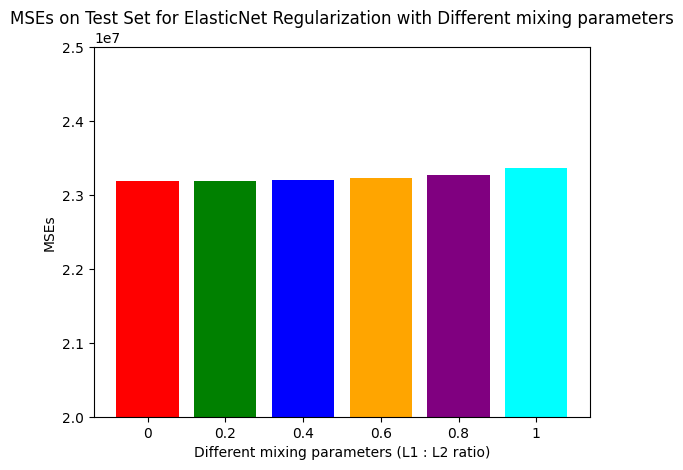

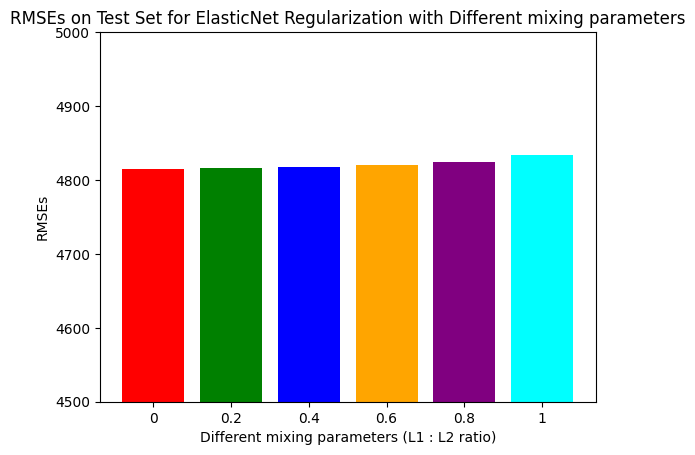

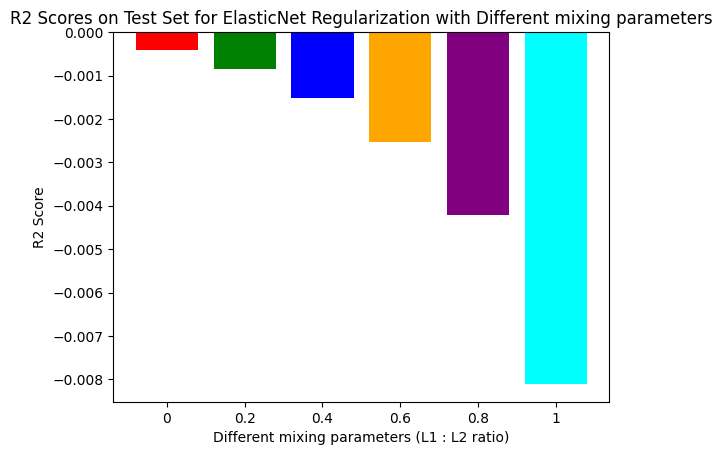

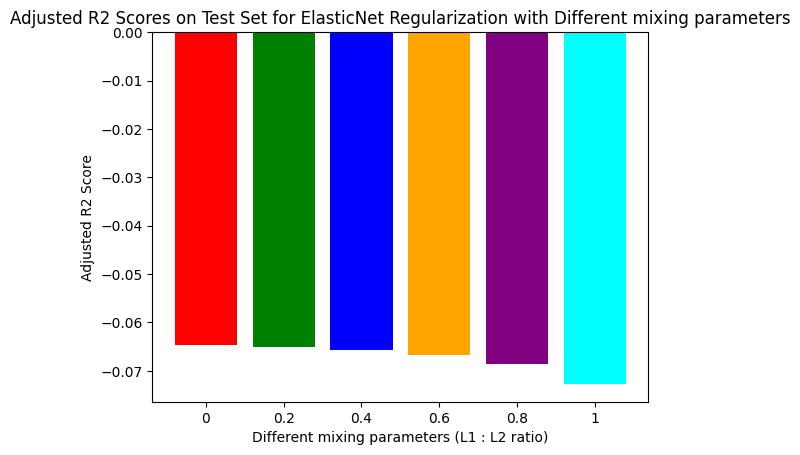

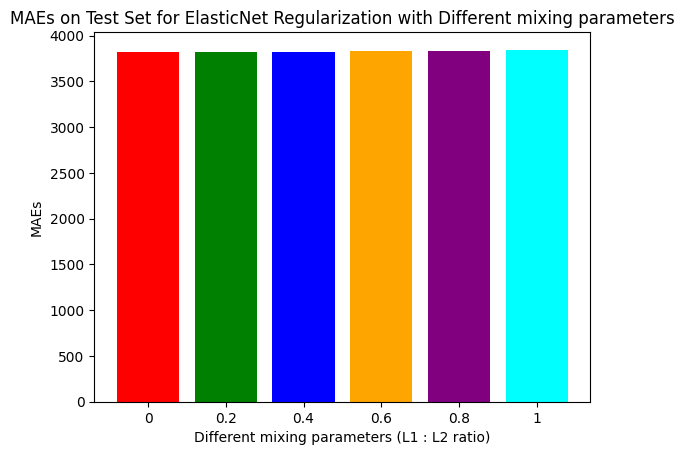

In [16]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

# Trying out different mixing parameters - in scikit learn, that's l1_ratio, not alpha.

diff_ratios = [0, 0.2, 0.4, 0.6, 0.8, 1]

train_mses = []
test_mses = []

train_rmses = []
test_rmses = []

train_r2s = []
test_r2s = []

train_adj_r2s = []
test_adj_r2s = []

train_maes = []
test_maes = []

for i in diff_ratios:
    print(f"For l1 : l2 ratio of {i} : {1-i}\n")
    model = ElasticNet(random_state = 19, l1_ratio = i)
    reg_line = model.fit(x_train, y_train) # Fitting the model with x_train and y_train from part (c)

    enet_y_train_pred = model.predict(x_train) # Finding out predictions of model on train set.
    enet_y_test_pred = model.predict(x_test) # Finding out predictions of model on test set.

    enet_mse_train = mean_squared_error(y_train, enet_y_train_pred)
    enet_mse_test = mean_squared_error(y_test, enet_y_test_pred)

    print(f"Test MSE Error : {enet_mse_test}")
    train_mses.append(enet_mse_train)
    test_mses.append(enet_mse_test)

    enet_rmse_train = root_mean_squared_error(y_train, enet_y_train_pred)
    enet_rmse_test = root_mean_squared_error(y_test, enet_y_test_pred)

    print(f"Test RMSE Error : {enet_rmse_test}")
    train_rmses.append(enet_rmse_train)
    test_rmses.append(enet_rmse_test)

    enet_r2_train = r2_score(y_train, enet_y_train_pred)
    enet_r2_test = r2_score(y_test, enet_y_test_pred)

    print(f"Test R2 Score : {enet_r2_test}")
    train_r2s.append(enet_r2_train)
    test_r2s.append(enet_r2_test)

    enet_n_obs_train = len(y_train)
    enet_n_obs_test = len(y_test)
    enet_n_regressors = len(column_list)

    # Adjusted R2 Score -> 1 - (((1 - r2 score) * (sample size - 1)) / (sample size - no. of regressors - 1))
    enet_r2_adj_train = 1 - (((1-enet_r2_train) * (enet_n_obs_train-1)) / (enet_n_obs_train - enet_n_regressors - 1))
    enet_r2_adj_test = 1 - (((1-enet_r2_test) * (enet_n_obs_test-1)) / (enet_n_obs_test - enet_n_regressors - 1))

    print(f"Test Adjusted R2 Score : {enet_r2_adj_test}")
    train_adj_r2s.append(enet_r2_adj_train)
    test_adj_r2s.append(enet_r2_adj_test)

    enet_mae_train = mean_absolute_error(y_train, enet_y_train_pred)
    enet_mae_test = mean_absolute_error(y_test, enet_y_test_pred)

    print(f"Test MAE Error : {mae_test}\n")
    train_maes.append(enet_mae_train)
    test_maes.append(enet_mae_test)

diff_ratios_str = ['0', '0.2', '0.4', '0.6', '0.8', '1']
colors_l = ['red', 'green', 'blue', 'orange', 'purple', 'cyan'] # Color of the different bars in the graph

# Plotting MSEs
plt.bar(diff_ratios_str, test_mses, color = colors_l)
plt.xlabel('Different mixing parameters (L1 : L2 ratio)')
plt.ylabel('MSEs')
plt.title('MSEs on Test Set for ElasticNet Regularization with Different mixing parameters')
plt.ylim((2*1e7, 2.5*1e7))
plt.show()

# Plotting RMSEs
plt.bar(diff_ratios_str, test_rmses, color = colors_l)
plt.xlabel('Different mixing parameters (L1 : L2 ratio)')
plt.ylabel('RMSEs')
plt.title('RMSEs on Test Set for ElasticNet Regularization with Different mixing parameters')
plt.ylim((4500,5000))
plt.show()

# Plotting R2 Scores
plt.bar(diff_ratios_str, test_r2s, color = colors_l)
plt.xlabel('Different mixing parameters (L1 : L2 ratio)')
plt.ylabel('R2 Score')
plt.title('R2 Scores on Test Set for ElasticNet Regularization with Different mixing parameters')
plt.show()

# Plotting Adjusted R2 Scores
plt.bar(diff_ratios_str, test_adj_r2s, color = colors_l)
plt.xlabel('Different mixing parameters (L1 : L2 ratio)')
plt.ylabel('Adjusted R2 Score')
plt.title('Adjusted R2 Scores on Test Set for ElasticNet Regularization with Different mixing parameters')
plt.show()

# Plotting MAEs
plt.bar(diff_ratios_str, test_maes, color = colors_l)
plt.xlabel('Different mixing parameters (L1 : L2 ratio)')
plt.ylabel('MAEs')
plt.title('MAEs on Test Set for ElasticNet Regularization with Different mixing parameters')
plt.show()

It is very evident from the graphs that when L1:L2 is 0:1, the best results emerge. So, when it’s completely an L2 penalty and no L1 penalty is there, the model is the best. This is also called Ridge Regression.

Part (h) -> Gradient Boosting Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

model = GradientBoostingRegressor(random_state=19)
reg_line = model.fit(x_train, y_train) # Fitting the model

gbr_y_train_pred = model.predict(x_train) # Finding out predictions of model on train set.
gbr_y_test_pred = model.predict(x_test) # Finding out predictions of model on test set.

gbr_mse_train = mean_squared_error(y_train, gbr_y_train_pred)
gbr_mse_test = mean_squared_error(y_test, gbr_y_test_pred)

print(f"MSE Error -> Train : {gbr_mse_train}, Test : {gbr_mse_test}")

gbr_rmse_train = root_mean_squared_error(y_train, gbr_y_train_pred)
gbr_rmse_test = root_mean_squared_error(y_test, gbr_y_test_pred)

print(f"RMSE Error -> Train : {gbr_rmse_train}, Test : {gbr_rmse_test}")

gbr_r2_train = r2_score(y_train, gbr_y_train_pred)
gbr_r2_test = r2_score(y_test, gbr_y_test_pred)

print(f"R2 Score -> Train : {gbr_r2_train}, Test : {gbr_r2_test}")

gbr_n_obs_train = len(y_train)
gbr_n_obs_test = len(y_test)
gbr_n_regressors = len(column_list)

# Adjusted R2 Score -> 1 - (((1 - r2 score) * (sample size - 1)) / (sample size - no. of regressors - 1))
gbr_r2_adj_train = 1 - (((1-gbr_r2_train) * (gbr_n_obs_train-1)) / (gbr_n_obs_train - gbr_n_regressors - 1))
gbr_r2_adj_test = 1 - (((1-gbr_r2_test) * (gbr_n_obs_test-1)) / (gbr_n_obs_test - gbr_n_regressors - 1))

print(f"Adjusted R2 Score -> Train : {gbr_r2_adj_train}, Test : {gbr_r2_adj_test}")

gbr_mae_train = mean_absolute_error(y_train, gbr_y_train_pred)
gbr_mae_test = mean_absolute_error(y_test, gbr_y_test_pred)

print(f"MAE Error -> Train : {gbr_mae_train}, Test : {gbr_mae_test}")

MSE Error -> Train : 14771770.828076074, Test : 24940708.828536887
RMSE Error -> Train : 3843.4061492478354, Test : 4994.067363235791
R2 Score -> Train : 0.41182538441231875, Test : -0.07630374428523656
Adjusted R2 Score -> Train : 0.4028593079551894, Test : -0.14529757404711074
MAE Error -> Train : 3071.687613637683, Test : 3914.8076485021365


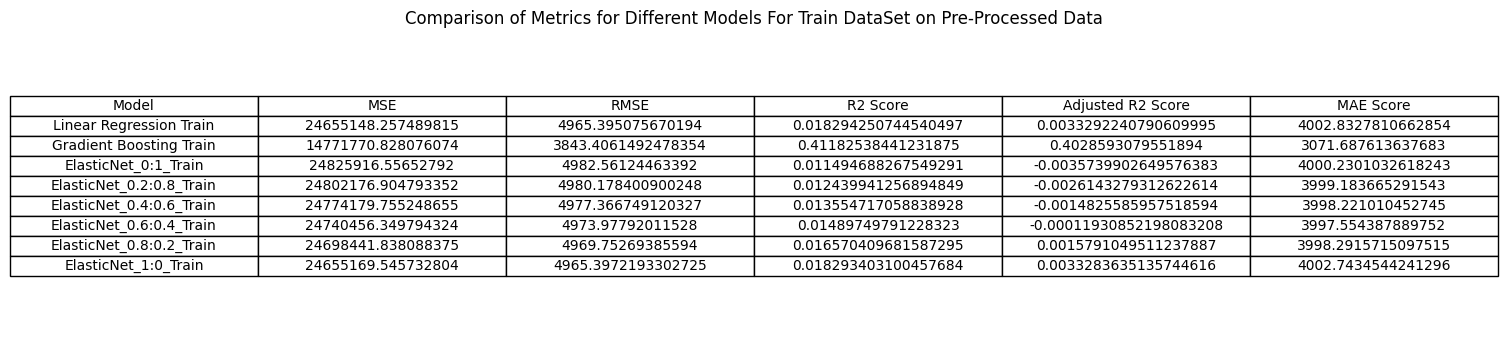

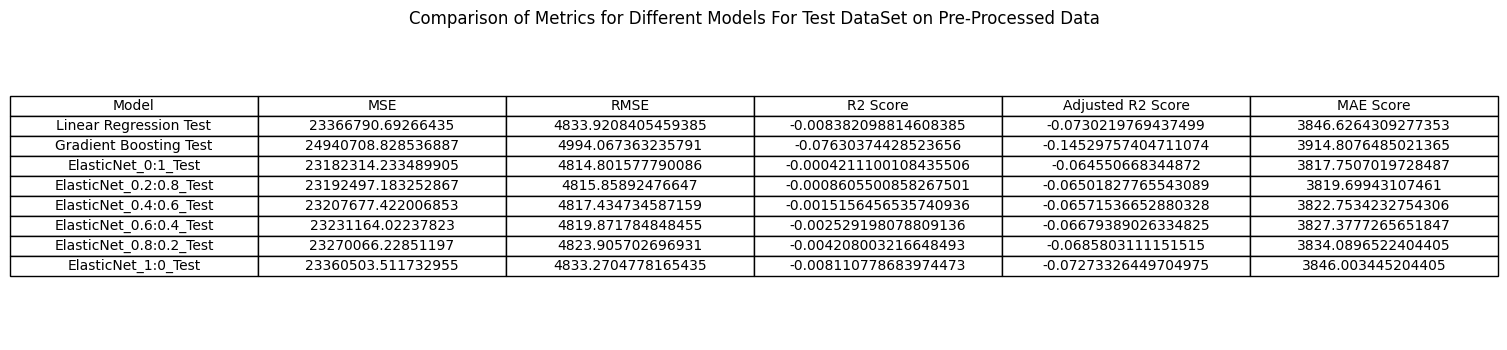

In [18]:
# The following data has some columns with ratios in their names. This is the ratio between L1 and L2 penalties.

data_train = {
    'Model': ['Linear Regression Train', 'Gradient Boosting Train', 'ElasticNet_0:1_Train', 'ElasticNet_0.2:0.8_Train', 'ElasticNet_0.4:0.6_Train', 'ElasticNet_0.6:0.4_Train', 'ElasticNet_0.8:0.2_Train', 'ElasticNet_1:0_Train'],
    'MSE': [mse_train, gbr_mse_train, train_mses[0], train_mses[1], train_mses[2], train_mses[3], train_mses[4], train_mses[5]],
    'RMSE': [rmse_train, gbr_rmse_train, train_rmses[0], train_rmses[1], train_rmses[2], train_rmses[3], train_rmses[4], train_rmses[5]],
    'R2 Score': [r2_train, gbr_r2_train, train_r2s[0], train_r2s[1], train_r2s[2], train_r2s[3], train_r2s[4], train_r2s[5]],
    'Adjusted R2 Score': [r2_adj_train, gbr_r2_adj_train, train_adj_r2s[0], train_adj_r2s[1], train_adj_r2s[2], train_adj_r2s[3], train_adj_r2s[4], train_adj_r2s[5]],
    'MAE Score': [mae_train, gbr_mae_train, train_maes[0], train_maes[1], train_maes[2], train_maes[3], train_maes[4], train_maes[5]]
}

data_test = {
    'Model': ['Linear Regression Test', 'Gradient Boosting Test', 'ElasticNet_0:1_Test', 'ElasticNet_0.2:0.8_Test', 'ElasticNet_0.4:0.6_Test', 'ElasticNet_0.6:0.4_Test', 'ElasticNet_0.8:0.2_Test', 'ElasticNet_1:0_Test'],
    'MSE': [mse_test, gbr_mse_test, test_mses[0], test_mses[1], test_mses[2], test_mses[3], test_mses[4], test_mses[5]],
    'RMSE': [rmse_test, gbr_rmse_test, test_rmses[0], test_rmses[1], test_rmses[2], test_rmses[3], test_rmses[4], test_rmses[5]],
    'R2 Score': [r2_test, gbr_r2_test, test_r2s[0], test_r2s[1], test_r2s[2], test_r2s[3], test_r2s[4], test_r2s[5]],
    'Adjusted R2 Score': [r2_adj_test, gbr_r2_adj_test, test_adj_r2s[0], test_adj_r2s[1], test_adj_r2s[2], test_adj_r2s[3], test_adj_r2s[4], test_adj_r2s[5]],
    'MAE Score': [mae_test, gbr_mae_test, test_maes[0], test_maes[1], test_maes[2], test_maes[3], test_maes[4], test_maes[5]]
}

data_train = pd.DataFrame(data_train)

fig, ax = plt.subplots(figsize=(16, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data_train.values.tolist(), colLabels=data_train.columns.tolist(), cellLoc='center', loc='center')
table.auto_set_font_size(True)
table.scale(1.2, 1.2)

plt.title("Comparison of Metrics for Different Models For Train DataSet on Pre-Processed Data")
plt.show()




data_test = pd.DataFrame(data_test)

fig, ax = plt.subplots(figsize=(16, 4))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data_test.values.tolist(), colLabels=data_test.columns.tolist(), cellLoc='center', loc='center')
table.auto_set_font_size(True)
table.scale(1.2, 1.2)

plt.title("Comparison of Metrics for Different Models For Test DataSet on Pre-Processed Data")
plt.show()


ElasticNet with a complete L2 penalty has the best scores and least errors for the test set, and so that is the best model. For train, gradient boosting has ridiculously good stats compared to the others but its test performance shows that it is overfitting immensely. So, ElasticNet beats it in that regard.